In [18]:
import sys
import os, glob
import numpy as np
import subprocess
import nibabel
import copy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pltn

In [19]:
# not necessary through available files
sys.path.append('/Scripts/')
import mm_helpers

In [20]:
# not necessary through available files
sys.path.append('/Scripts/')
import rc_helpers
import rc_GetInfoFromDb

In [21]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/mrstats/maamen/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['norm', 'number', 'copy', 'cond', 'e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [22]:
serie='full'
norm='0'
cond='179'
atlas='atlas_complete_GM'
paired='1'
resi=0
matrices='ZpartialCorrelation'
norm2='subject'
method='_ledoit_wolf'
movement=False

In [88]:
#define the data
if cond=='179':
    number=np.int(cond)
    data=['/fMRI_RS/SUBJECT/times_series/ICA_AROMA_nonaggr_nr_hp_atlas_subcort_cerebellum_1mm_4D_warped_th_reg_'+matrices+''+method+'_149_152_155_158_159_160.txt',
            '/fMRI_STOP/SUBJECT/denoised_func_data_nonaggr/times_series/denoised_func_data_nonaggr_hp_atlas_subcort_cerebellum_1mm_4D_warped_th_reg_'+matrices+''+method+'_149_152_155_158_159_160.txt',
            '/fMRI_REWARD/SUBJECT/denoised_func_data_nonaggr_hp_atlas_subcort_cerebellum_1mm_4D_warped_th_reg_'+matrices+''+method+'_149_152_155_158_159_160.txt',
            '/fMRI_WM/SUBJECT/denoised_func_data_nonaggr_hp_atlas_subcort_cerebellum_1mm_4D_warped_th_reg_'+matrices+''+method+'_149_152_155_158_159_160.txt',
            ]
    NeuroIMAGE=['RS','STOP','REWARD','WM']
    fold='BS_Control'+matrices+'_LW'
    fold='paired_'+fold

if atlas=='atlas_complete_GM':
    for i in range(len(data)):
        data[i]=data[i].replace('atlas_subcort_cerebellum','atlas_complete_GM')
    fold=fold+'withoutWM'

# select and check healthy subjects
suj=[np.unique([mm_helpers.find_subject(i,'NeuroIMAGE') for i in glob.glob(j.replace('SUBJECT','*').replace('CONDITION','*'))]) for j in data]
#file available
np.save('/subject_initial',suj)#file available

selec=len(NeuroIMAGE)
allinfo=[dict() for t in range(selec)]
for t in range(selec):
    for s in suj[t]:
        allinfo[t].update({s : {s:s,'run':[]}})


    allinfo[t]=rc_helpers.selectControl(allinfo[t])
    allinfo[t]=rc_helpers.check_movers(allinfo[t])
        
    suj[t]=sorted(allinfo[t].keys())
#file available
np.save('/subject',suj)


#get behavioural value
if norm=='0':
    fold=fold+'/notNorm'


if norm2=='subject':
    fold=fold+'_subjectNorm'





423
229
['19-222-10529', '19-167-10288', '19-832-8099', '98-335-30149', '19-90-1150', '19-59-1066', '19-136-10151', '98-154-10229', '19-831-8096', '19-51-0012', '19-227-10551']
410
235
['98-335-30149', '19-90-1150', '98-535-1449', '19-96-1161', '19-136-10152', '19-136-10151', '19-260-10700', '98-520-1386', '19-93-1156', '19-259-10694', '19-259-10695']
479
248
['98-530-1426', '19-832-8099', '98-335-30149', '98-535-1448', '19-78-1111', '19-96-1161', '98-537-1460', '19-259-10694', '98-154-10229', '19-831-8096', '19-51-0012', '19-227-10551']
461
260
['98-530-1426', '19-832-8099', '19-90-1150', '19-59-1066', '19-96-1161', '19-136-10152', '98-537-1460', '19-259-10694', '19-93-1156', '19-259-10695', '19-831-8096', '19-51-0012', '19-227-10551']


In [24]:
#create task pairing
Tpair=[[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]
if paired=='1' or movement==True:
    indexPopTpair=[[] for i in range(len(Tpair))]
    for i in range(len(Tpair)):
        try:
            indexPopTpair[i]=[[j for j,e in enumerate(suj[Tpair[i][0]]) if e in suj[Tpair[i][1]]],[np.where(suj[Tpair[i][1]]==e)[0][0] for e in suj[Tpair[i][0]] if e in suj[Tpair[i][1]]]]
        except:
            indexPopTpair[i]=[[j for j,e in enumerate(suj[Tpair[i][0]]) if e in suj[Tpair[i][1]]],[suj[Tpair[i][1]].index(e) for e in suj[Tpair[i][0]] if e in suj[Tpair[i][1]]]]


In [37]:
myquery2= """SELECT `Subject`,`age` FROM `Phenotype_info`"""
allinfo_age = rc_GetInfoFromDb.get_query(myquery2,['subject','age'],"neuroimage")
#file available
np.save('/allinfo_age',allinfo_age)#file available

myquery2= """SELECT `Subject`,`Gender` FROM `Phenotype_info`"""
allinfo_gender = rc_GetInfoFromDb.get_query(myquery2,['subject','gender'],"neuroimage")
#file available
np.save('/allinfo_gender',allinfo_gender)#file available

queryT = "SELECT `subject_number`,`SeriesNumber`,`ScanProtocol`,`rmsFD_Jenkinson`  FROM `MRI_series_info` "
allinfo_rms=rc_GetInfoFromDb.get_query(queryT, ['subject','sn','sp','jen'], 'neuroimage', True)
#file available
np.save('/allinfo_rms',allinfo_rms)#file available

queryT = "SELECT `subject_number`,`TR_fMRI`,`TR_rsfMRI`  FROM `MRI_session_info` "
allinfo_TR=rc_GetInfoFromDb.get_query(queryT, ['subject','tr','trrs'], 'neuroimage', True)
#file available
np.save('/allinfo_TR',allinfo_TR)#file available

In [90]:
#load normalized Z partial correlation matrices and subject characteristics
Upmatrices=[[] for t in range(len(NeuroIMAGE))]
age=[[] for t in range(len(suj))]
gender=[[] for t in range(len(suj))]
rms=[[] for t in range(len(suj))]
tr=[[] for t in range(len(suj))]
tri=np.zeros((number,number))
tri[np.triu_indices(number,1)]=1
import copy

###supplement description
Zpartial_Upmatrices=[[] for t in range(len(NeuroIMAGE))]
UpmatricesIni=[[] for t in range(len(NeuroIMAGE))]


for t in range(len(NeuroIMAGE)):
    prov2=[]
    for s in suj[t]:
        dat=glob.glob(data[t].replace('SUBJECT',s))
        for f in dat:
            ###copy data
            ##create directory
            #pathcopy='/fMRI_'+NeuroIMAGE[t]+'/'+s+'/'
            #if not os.path.exists(pathcopy):
            #    os.makedirs(pathcopy)
            ##copy file
            #subprocess.call(['cp',f,f.replace(os.path.dirname(f),pathcopy)])
            #subprocess.call(['cp',f.replace('.txt','NORM.txt'),f.replace('.txt','NORM.txt').replace(os.path.dirname(f),pathcopy)])
            ###
            do=1
            if norm=='0' and paired=='1' and t!=0:
                if s in suj[0]:
                    prov=np.loadtxt(f)
                    prov2=np.loadtxt(f)
                    provrest=np.loadtxt(glob.glob(data[0].replace('SUBJECT',s))[0])
                else:
                    do=0
            else:
                prov=np.loadtxt(f)
                prov2=np.loadtxt(f)
                
            if do==1:
                #normalization
                if norm=='subject' or norm2=='subject':
                    #mixture modelling
                    prov=np.loadtxt(f.replace('.txt','NORM.txt'))
                    prov2=np.loadtxt(f)
                    if norm=='0' and paired=='1' and t!=0:
                        provrest=np.loadtxt((glob.glob(data[0].replace('SUBJECT',s))[0]).replace('.txt','NORM.txt'))
                if norm=='0' and paired=='1' and t!=0:
                    UpmatricesIni[t]+=[copy.deepcopy(prov)]
                    prov=prov-provrest
                    
                if norm=='0' and paired=='1' and t==0:
                    UpmatricesIni[t]+=[copy.deepcopy(prov)]
                
                Upmatrices[t]+=[prov]
                Zpartial_Upmatrices[t]+=[prov2]
                age[t]+=[np.float(allinfo_age[k]['age']) for k in allinfo_age.keys() if allinfo_age[k]['subject']==s]
                gender[t]+=[allinfo_gender[k]['gender'] for k in allinfo_age.keys() if allinfo_age[k]['subject']==s]
                if t!=0:
                    rms[t]+=[np.mean([allinfo_rms[k]['jen'] for k in allinfo_rms.keys() if (allinfo_rms[k]['subject']==s) & (allinfo_rms[k]['sp']=='fMRI_'+NeuroIMAGE[t])])]
                    tr[t]+=[allinfo_TR[k]['tr'] for k in allinfo_TR.keys() if allinfo_TR[k]['subject']==s]
                if t==0:
                    rms[t]+=[np.mean([allinfo_rms[k]['jen'] for k in allinfo_rms.keys() if (allinfo_rms[k]['subject']==s) & (allinfo_rms[k]['sp']=='rs_fMRI')])]
                    tr[t]+=[allinfo_TR[k]['trrs'] for k in allinfo_TR.keys() if allinfo_TR[k]['subject']==s]

if norm=='rest' and paired=='0':
    UpmatricesIni=copy.deepcopy(Upmatrices)
    
if not os.path.exists('/'+fold+'/'+np.str(number)+'/dist_pdf'):
    os.makedirs('/'+fold+'/'+np.str(number)+'/dist_pdf')

#atlas details
number2=11
net=['visual1','motor','fronto-temp','visual2','R_attention','DMN','auditory','L_attention','cingulum','sub-cort','cereb']
group=[0 for i in range(20)]+[1 for i in range(11)]+[2 for i in range(22)]+[3 for i in range(22)]+[4 for i in range(18)]+[5 for i in range(8)]+[6 for i in range(18)]+[7 for i in range(13)]+[8 for i in range(7)]+[9 for i in range(17)]+[10 for i in range(23)]
    
Nareas=[20,11,22,22,18,8,18,13,7,17,23]
groupnet=[' ' for i in range(len(group))]#
groupnet[Nareas[0]/2]='visual1'
j=1
for i in range(len(group)):
    if i>0 and group[i] != group[i - 1]:
        groupnet[i+Nareas[j]/2]=net[group[i]]
        j+=1



In [39]:
def make_demofig(mytitle, sample_sex, sample_age, agehist, agebins, ymax,savetitle):
    #author: maarten mennes
    sns.set_style('white')
    sns.set_style('ticks')
    rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
    fig = plt.figure(figsize=[16,6], dpi=300)
    
    # plot age histogram
    ax1 = fig.add_subplot(111)
    
    width = 0.6*(agebins[1]-agebins[0])
    center = (agebins[:-1]+agebins[1:])/2
    # plot bars
    ax1.bar(center, agehist, color='#f1ff19', align = 'center', width=width)
    ax1.set_xlim([0,95])
    # change ticks and spines
    ax1.set_xticks(range(0,95,10))
    ax1.tick_params('both',labelsize=18, pad=10, which='major', right='off', top='off', width=2, direction='in')
    ax1.spines["right"].set_visible(False)
    ax1.spines["top"].set_visible(False)
    # add labels
    ax1.set_ylabel('N Individuals', fontdict={'fontsize':24},labelpad=12)
    ax1.set_xlabel('Age', fontdict={'fontsize':24},labelpad=12)
    #ax1.set_title('Age Distribution', fontdict={'fontsize':24})
    ax1.axhline(y=-1, linewidth=4, color ='k')
    ax1.axvline(x=0, linewidth=3, color ='k')
    ax1.set_ylim([-1, ymax])
    ax1.set_yticks(range(0,ymax+1,5))
    
    
    
    # plot pie chart in empty space histogram
    a = plt.axes([.68, .45, .15, .33], axisbg='y')
    wedges, texts, autotexts = pylab.pie([sample_sex.count(1), sample_sex.count(0)], labels=['Male', 'Female'], autopct='%1.0f%%', startangle=90, colors=['CornflowerBlue', 'Orchid'])
    wedges[0].set_lw(1)
    wedges[1].set_lw(1)
    proptease = matplotlib.font_manager.FontProperties()
    proptease.set_size('12')
    plt.setp(autotexts, fontproperties=proptease)
    proptease.set_size('14')
    plt.setp(texts, fontproperties=proptease)
    title('Sex Distribution', fontdict={'fontsize':18})
    
    
    pies = [len([x for x in sample_age if 20 < x <100]), 
            len([x for x in sample_age if 16 < x < 19.9]), 
            len([x for x in sample_age if 12 < x <15.9]), 
            len([x for x in sample_age if x <11.9])]
    pielabels = ['>20', '16-20', '12-16', '<12']
    piecolors = ['#7bb0ca','#a0c6d9','#c4dce7','#e9f2f6']
    count = 0
    mypies = []
    mypielabels = []
    mypiecolors = []
    for p in range(0,len(pies)):
        if pies[p] > 0:
            mypies.append(pies[p])
            mypielabels.append(pielabels[p])
            mypiecolors.append(piecolors[p])
    
        
    a = plt.axes([.45, .45, .15, .33], axisbg='y')        
    wedges, texts, autotexts = pylab.pie(mypies, labels=mypielabels, autopct='%1.0f%%', startangle=90, colors=mypiecolors)
    wedges[0].set_lw(1)
    wedges[1].set_lw(1)
    proptease = matplotlib.font_manager.FontProperties()
    proptease.set_size('12')
    plt.setp(autotexts, fontproperties=proptease)
    proptease.set_size('14')
    plt.setp(texts, fontproperties=proptease)
    title('Age Distribution', fontdict={'fontsize':18})
    
    # make sure full xlabel is there
    gcf().subplots_adjust(bottom=0.15)
    
    plt.suptitle(mytitle, fontdict={'fontsize':24})
    plt.savefig(savetitle)
    plt.show()
    
    return

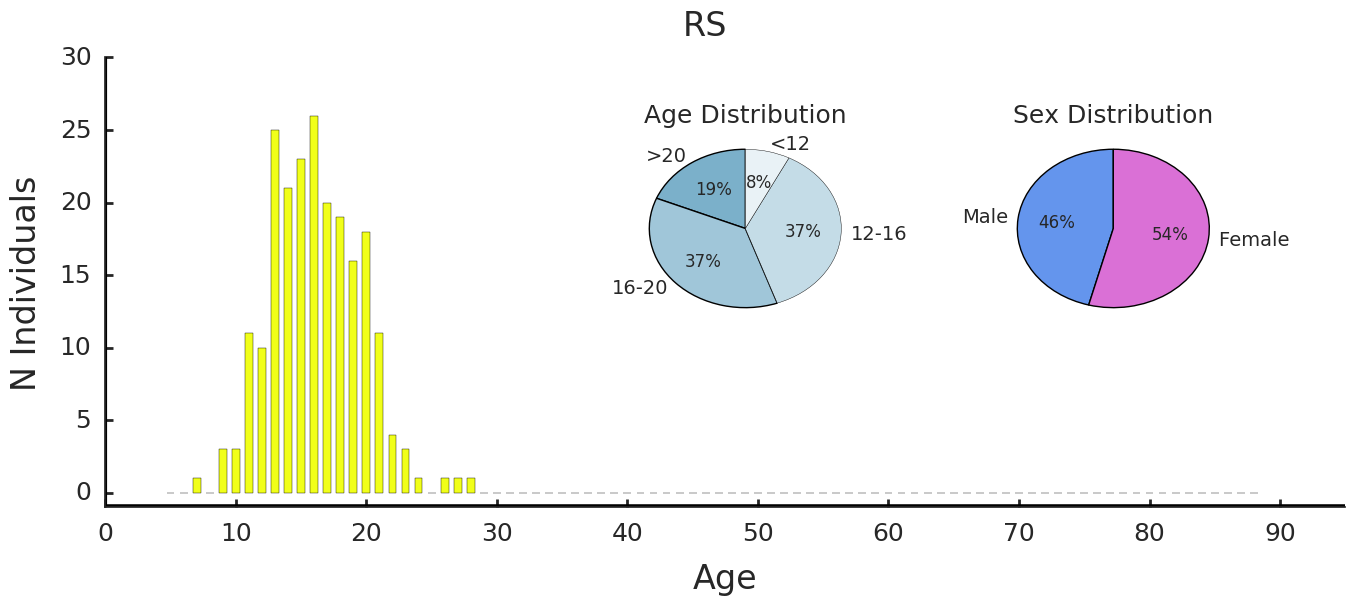

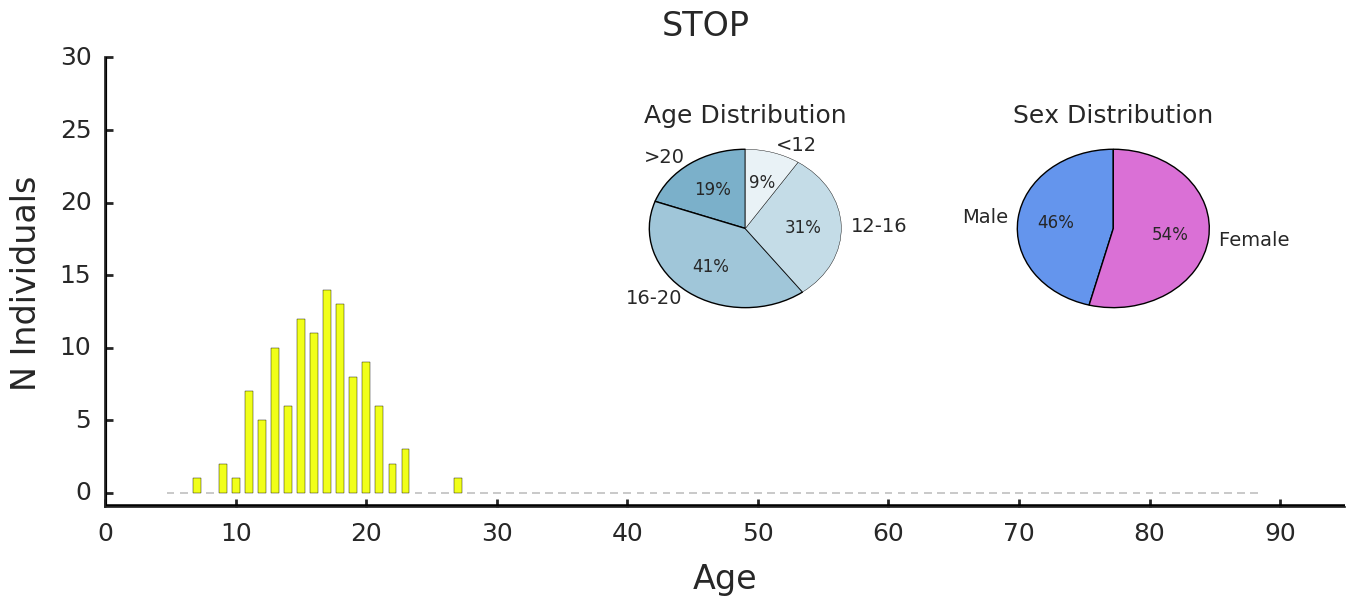

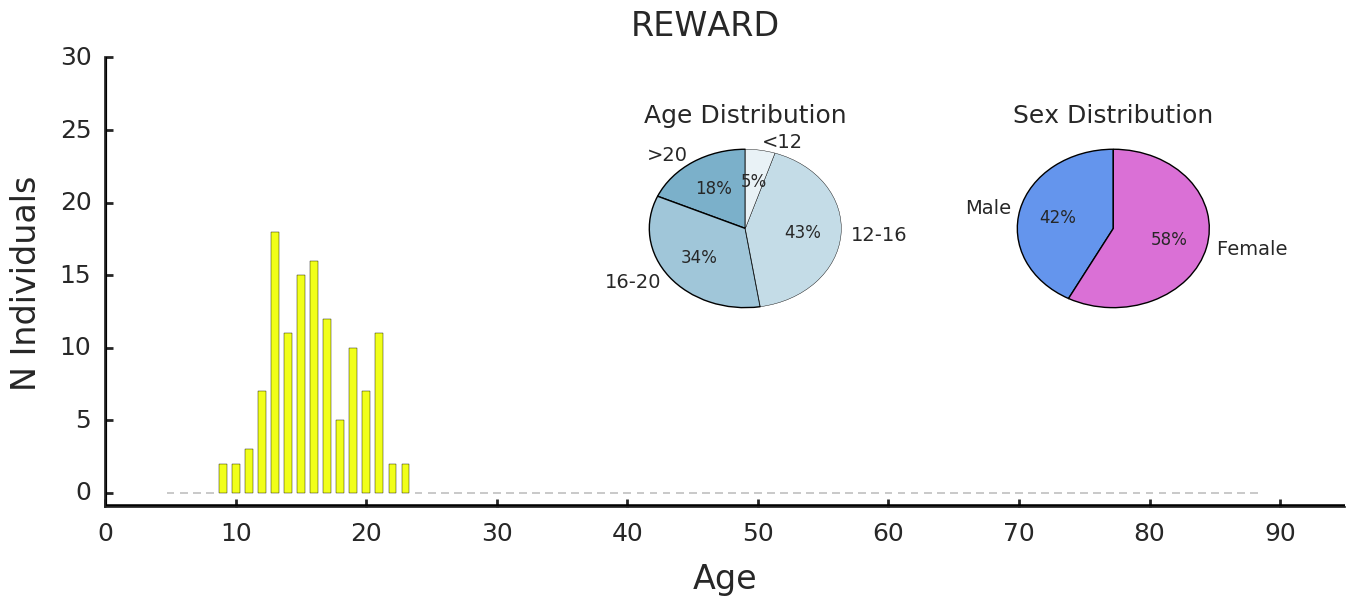

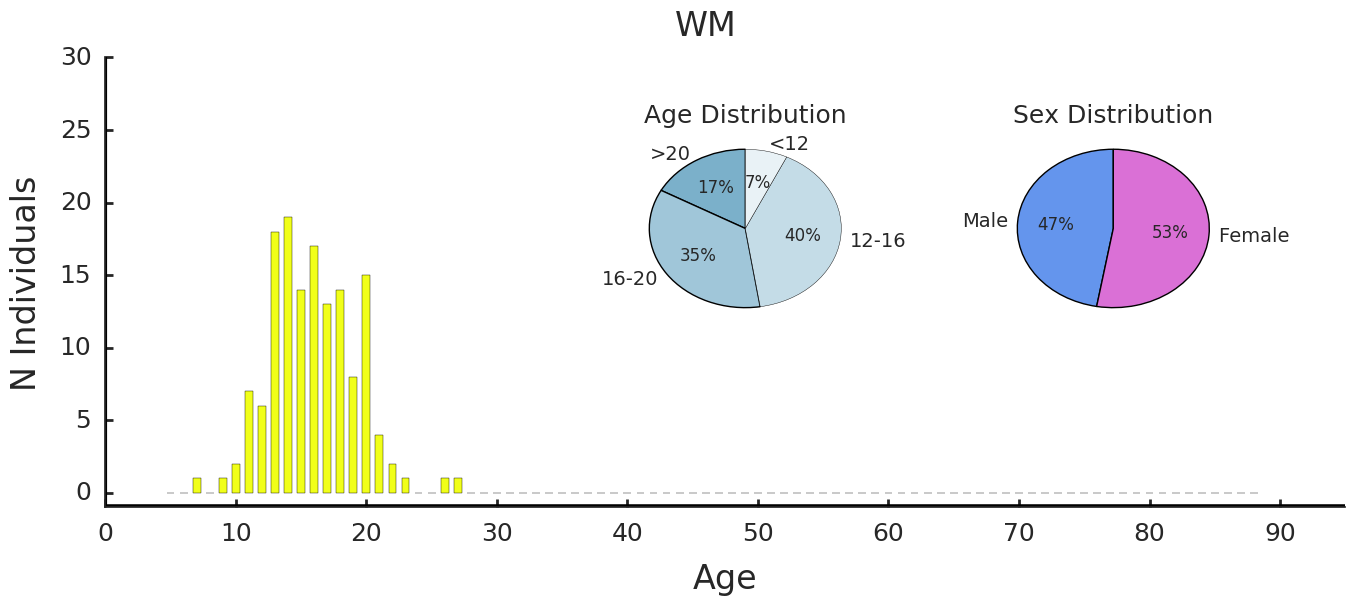

In [40]:
#suplementary figure 1
for i in range(len(NeuroIMAGE)):
    ymax=30
    sample = NeuroIMAGE[i]
    sample_sex = [int(j=='M') for j in gender[i]]
    sample_age = age[i]
    
    agehist, agebins = np.histogram(sample_age, bins=range(5,90,1))
    
    make_demofig(NeuroIMAGE[i], sample_sex, sample_age, agehist, agebins, ymax,'/'+fold+'/'+np.str(number)+'/demographic'+NeuroIMAGE[i]+'.pdf')


# reordering and standardization 

In [41]:
def reordering(mat):
    import scipy
    if len(mat)!=179:
        print 'ordering not adequate'
        return
    UpArea=[0,20,31,53,75,93,101,119,132,139,156,179]
    order=[]
    
    for i in range(len(UpArea)-1):
        print i

        prov=(mat[UpArea[i]:UpArea[i+1],UpArea[i]:UpArea[i+1]])+int(1-np.min(mat))#np.abs(mat[UpArea[i]:UpArea[i+1],UpArea[i]:UpArea[i+1]])#
        Q=-prov
        t=np.zeros(prov.shape)
        for j in range(len(prov)):
            Q[j,j]=np.sum(prov[j][[g for g in range(len(prov)) if g!=j]],0)
            t[j][j]=1./np.sqrt(np.sum(prov[j]))
        D=np.dot(np.dot(t,Q),t)
        v=scipy.linalg.eig(D)[1][:,1]
        v2=np.dot(t,v)
        order+=[UpArea[i]+np.argsort(v2)]
    return order

In [42]:
#reordering of areas inside each network and reordering of networks, for visualization purposes
orderRest=reordering(np.mean(UpmatricesIni[0],0))
UpArea=[0,20,31,53,75,93,101,119,132,139,156,179]
order=np.array([0,3,6,1,2,4,7,5,8,9,10])
orderlevel1=order
orderrest2=np.concatenate([np.concatenate(orderRest,0)[UpArea[order[i]]:UpArea[order[i]+1]] for i in range(len(order))],0)

net=[net[i] for i in order]
group=[group[i] for i in orderrest2]
groupnet=np.concatenate([groupnet[UpArea[order[i]]:UpArea[order[i]+1]] for i in range(len(order))],0)
UpArea=[UpArea[i] for i in order]



0
1
2
3
4
5
6
7
8
9
10


In [43]:
def show_designmat(designmat,title='test',zmin=-1,zmax=1,color='coolwarm',net=net,group=group,groupnet=groupnet,minmat=[-1],maxmat=[1]):
    sns.set(style='white')    
    if color=='grad':
        color='YlOrRd'
    if color=='coolwarm':
        color=sns.diverging_palette(220, 20,   as_cmap=True)
        zmin=-np.max([-zmin,zmax])
        zmax=np.max([-zmin,zmax])
    matshow(designmat,group,title,groupnet,zmin,zmax,color,minmat,maxmat)


def matshow(designmat,networks,title='test',net=net,zmin=-1,zmax=1,color='hot',minmat=[-1],maxmat=[1]):
    import matplotlib.pyplot as plt

    fig=plt.figure(figsize=(12,9))
    plt.imshow(designmat, vmin=zmin,vmax=zmax,cmap=color,interpolation='none')
    plt.grid(False)
    #plt.title(title)
    plt.xticks(range(len(designmat)),net,size=20,rotation='vertical')
    plt.yticks(range(len(designmat)),net,size=20)
    plt.axis('tight')
    if minmat[0]<zmin:
        minlabadd='<'
    else:
        minlabadd=''
    if maxmat[0]>zmax:
        maxlabadd='>'
    else:
        maxlabadd=''
    if zmin<0:
        cbar=plt.colorbar(ticks=[zmin,zmin/2.,0,zmax/2.,zmax])
        if minmat!=-1 and maxmat!=1:
            minlab1=np.int(((((zmin-minmat[0])/(maxmat[0]-minmat[0]))*(maxmat[1]-minmat[1]))+minmat[1])*100)/100.
            maxlab1=np.int(((((zmax-minmat[0])/(maxmat[0]-minmat[0]))*(maxmat[1]-minmat[1]))+minmat[1])*100)/100.
            cbar.ax.set_yticklabels([np.str(minlab1)+' | '+minlabadd+np.str(np.int(zmin*100.)/100.),np.str(minlab1/2.)+' | '+np.str(np.int(zmin/2.*100.)/100.),'0 | 0',np.str(maxlab1/2.)+' | '+np.str(np.int(zmax/2.*100.)/100.),np.str(maxlab1)+' | '+maxlabadd+np.str(np.int(zmax*100.)/100.)],size=15)
    else:
        print [zmin,zmin+(zmax-zmin)/3.,zmin+2*(zmax-zmin)/3.,zmax]
        cbar=plt.colorbar(ticks=[zmin,zmin+(zmax-zmin)/3.,zmin+2*(zmax-zmin)/3.,zmax])
        if minmat!=-1 and maxmat!=1:
            minlab1=np.int(((((zmin-minmat[0])/(maxmat[0]-minmat[0]))*(maxmat[1]-minmat[1]))+minmat[1])*100)/100.
            maxlab1=np.int(((((zmax-minmat[0])/(maxmat[0]-minmat[0]))*(maxmat[1]-minmat[1]))+minmat[1])*100)/100.
            cbar.ax.set_yticklabels([np.str(minlab1)+' | '+minlabadd+np.str(np.int(zmin*100.)/100.),np.str(np.int((minlab1+(maxlab1-minlab1)/3.)*100.)/100.)+' | '+np.str(np.int((zmin+(zmax-zmin)/3.)*100.)/100.),np.str(int((minlab1+2*(maxlab1-minlab1)/3.)*100.)/100.)+' | '+np.str(np.int((zmin+2*(zmax-zmin)/3.)*100.)/100.),np.str(maxlab1)+' | '+maxlabadd+np.str(np.int(zmax*100.)/100.)],size=15)
    for i, network in enumerate(networks):
        if i>0 and network != networks[i - 1]:
            plt.axhline(i, c="w")
            plt.axvline(i, c="w")



    print title
    fig.tight_layout()
    plt.savefig('/'+fold+'/'+cond+'/'+title.replace(' ','_')+'.pdf')#ng')
    plt.close(fig)

def conceptmatshow(designmat,Zlabel,networks=group,title='test',net=groupnet,col=''):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    if col=='':
        col = sns.color_palette("muted", int(np.max(designmat)+1))
        
        col[4] = col[5]
    fig=plt.figure(figsize=(9,9))
    image=np.array([[array([ 1.,  1.,  1.], dtype=float32) for j in range(len(designmat[0]))] for i in range(len(designmat))])
    for i in range(int(np.max(designmat))):
        image[np.where(designmat==i+1)]=array([ col[i][0],  col[i][1],  col[i][2]], dtype=float32)
    for i in range(len(designmat)):
        image[i][i]=array([ 1.,  1.,  1.], dtype=float32)
    import matplotlib.patches as mpatch
    ordertitle=[1,2,3,4,0]##specific to our study
    for e,i in enumerate(ordertitle):
        plt.text(-20,number+np.int(15*4/int(np.max(designmat)))*(e+1), Zlabel[i],
              ha="center",
              size=int(20*4/int(np.max(designmat))),
              
              bbox=dict(boxstyle='round', fc=col[i], ec="k"))
    

    plt.imshow(image,interpolation='none')
    plt.grid(False)
    
    plt.xticks(range(len(designmat)),net,size=20,rotation='vertical')
    plt.yticks(range(len(designmat)),net,size=20)
    plt.axis('tight')
    plt.title=' \n '
    for i, network in enumerate(networks):
        if i>0 and network != networks[i - 1]:
            plt.axhline(i, c="k",alpha=0.2)
            plt.axvline(i, c="k",alpha=0.2)

    print title
    fig.tight_layout()
    plt.savefig('/'+fold+'/'+cond+'/'+title.replace(' ','_')+'.pdf')#ng')
    plt.close(fig)
    

def uplevel(s,bi=0):
    UpArea=[0, 20, 42, 60, 71, 93, 111, 124, 132, 139, 156,179]
    matprov=np.zeros((number2,number2))

    for i in range(number2):
        for j in range(i,number2):
            if i==j:
                prov=[]
                for k in range(UpArea[i],UpArea[i+1]-1):
                    if bi==1:
                        prov+=[np.float(r) for r in s[k][UpArea[j]+k-UpArea[i]+1:UpArea[j+1]]]
                    else:
                        prov+=[np.float(r) for r in s[k][UpArea[j]+k-UpArea[i]+1:UpArea[j+1]] if r!=0.]

                matprov[i][j]=np.mean(prov)*np.sqrt(len(prov))
            else:
                prov=[]
                for k in range(UpArea[i],UpArea[i+1]):
                    if bi==1:
                        prov+=[np.float(r) for r in s[k][UpArea[j]:UpArea[j+1]]]
                    else:
                        prov+=[np.float(r) for r in s[k][UpArea[j]:UpArea[j+1]] if r!=0.]

                matprov[i][j]=np.mean([f for f in prov])*np.sqrt(len(prov))
                matprov[j][i]=matprov[i][j]
            if np.isnan(matprov[i][j]):
                matprov[i][j]=0

    return matprov




In [44]:
def barplotpercent(dat,order=range(number2)):
    print dat,np.mean(dat,2)
    if atlas=='ICPAtlas_v3_2':
        N=np.array([12,21,18,20,23,17,13,27,14])
    else:
        N=np.array([20, 22, 18, 11, 22, 18, 13,  8,  7, 17, 23])
    import seaborn as sns
    col = sns.color_palette("muted",4)
    prov=np.array([100*np.ones(len(order))])
    prov[np.where(np.sum(dat,0)==0)]=0
    for t in range(len(dat)):
        
        plt.bar(np.arange(len(order)),prov[0][order],0.35,label=NeuroIMAGE[t+1],color=col[t+1])
        prov=prov-dat[t]
        #print prov, dat[t]
    plt.legend(loc='center left',bbox_to_anchor=(1,.5))
    plt.xticks(np.arange(len(net))-np.array([(len(net[i])/2.)/10. for i in order]),[net[i] for i in order],rotation=45)
    
    return


In [45]:
def from11to184(mat,net=net,group=group,groupnet=groupnet):
    UpArea=[0, 20, 42, 60, 71, 93, 111, 124, 132, 139, 156,179]
    matprov=np.zeros((number,number))
    for i in range(len(UpArea)-1):
        for j in range(i,len(UpArea)-1):
            matprov[UpArea[i]:UpArea[i+1],UpArea[j]:UpArea[j+1]]=mat[i][j]
            if j!=i:
                matprov[UpArea[j]:UpArea[j+1],UpArea[i]:UpArea[i+1]]=mat[j][i]
            else:
                matprov[range(UpArea[j],UpArea[j+1]),range(UpArea[j],UpArea[j+1])]=1
    return matprov

def doublemat(matup,matdown,change=1,net=net,group=group,groupnet=groupnet,orderUP='',orderDOWN=''):
    if len(matup)!=number:
        matup=from11to184(matup,net,group,groupnet)
        if orderDOWN!='':
            matup=matup[orderDOWN,:]
            matup=matup[:,orderDOWN]
    if len(matdown)!=number:
        matdown=from11to184(matdown,net,group,groupnet)
        if orderUP!='':
            matdown=matdown[orderUP,:]
            matdown=matdown[:,orderUP]
    #adjusting map gradient lower and higher triangle
    if change==1:
        if np.min(matup)>=0:
            sizeDown=float(np.max(matdown[np.triu_indices(number,1)])-np.min(matdown[np.triu_indices(number,1)]))
            sizeUp=float(np.max(matup[np.triu_indices(number,1)])-np.min(matup[np.triu_indices(number,1)]))
            matdown=((matdown-np.min(matdown))/sizeDown*sizeUp)+np.min(matup)
        else:
            sizeDown=float(np.max(np.abs(matdown))*2)
            sizeUp=float(np.max(np.abs(matup))*2)
            matdown=((matdown+sizeDown/2.)/sizeDown*sizeUp)-sizeUp/2.
    matprov=np.eye(number)
    matprov[np.triu_indices(number)]=matup[np.triu_indices(number)]
    matprov[np.tril_indices(number)]=matdown[np.tril_indices(number)]
    return matprov

def plotdoublemat(matup,matdown,title='test',zmin=-1,zmax=1,color='coolwarm',net=net,group=group,groupnet=groupnet,orderUP='',orderDOWN=''):
    if color=='grad':
        color='YlOrRd'
    if not np.min(matup)>=0:
        [minmat,maxmat]=[[-np.max(np.abs(matup)),-np.max(np.abs(matdown))],[np.max(np.abs(matup)),np.max(np.abs(matdown))]]

    else:
        [minmat,maxmat]=[[np.min(matup),np.min((matdown))],[np.max((matup)),np.max((matdown))]]
    show_designmat(doublemat(matup,matdown,net,group,groupnet,orderUP,orderDOWN),title,zmin,zmax,color,net,group,groupnet,minmat,maxmat)

In [46]:
#figure 4 and supplementary figure 3
UpmatMeanInit=np.array([np.mean(np.array(UpmatricesIni[i]),0)*np.sqrt(len(UpmatricesIni[i])) for i in range(len(NeuroIMAGE))])
for i in range(len(NeuroIMAGE)):
    prov=UpmatMeanInit[i]
    matupprov=prov[orderrest2,:]
    matupprov=matupprov[:,orderrest2]
    matdown=uplevel(matupprov,1)
    matdownprov=matdown
    plotdoublemat(matupprov,matdownprov,'double_MeanInitialReOrdered_'+NeuroIMAGE[i],-2.3,2.3,color='coolwarm')#np.min(matdownprov),np.max(matdownprov)


double_MeanInitialReOrdered_RS
double_MeanInitialReOrdered_STOP
double_MeanInitialReOrdered_REWARD
double_MeanInitialReOrdered_WM


In [48]:
#reordering
if paired=='1' and norm=='0':
    Upmatrices[0]=Upmatrices[0]-np.mean(Upmatrices[0],0)
    
    for t in range(len(NeuroIMAGE)):
        if t!=0:
            suj[t]=[suj[t][y] for y in indexPopTpair[t-1][1]]
    
        for s in range(len(Upmatrices[t])):
            Upmatrices[t][s]=Upmatrices[t][s][orderrest2,:]
            Upmatrices[t][s]=Upmatrices[t][s][:,orderrest2]


/home/mrstats/maamen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/mrstats/maamen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/mrstats/maamen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:67: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/mrstats/maamen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:76: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/mrstats/maamen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:104: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/mrs

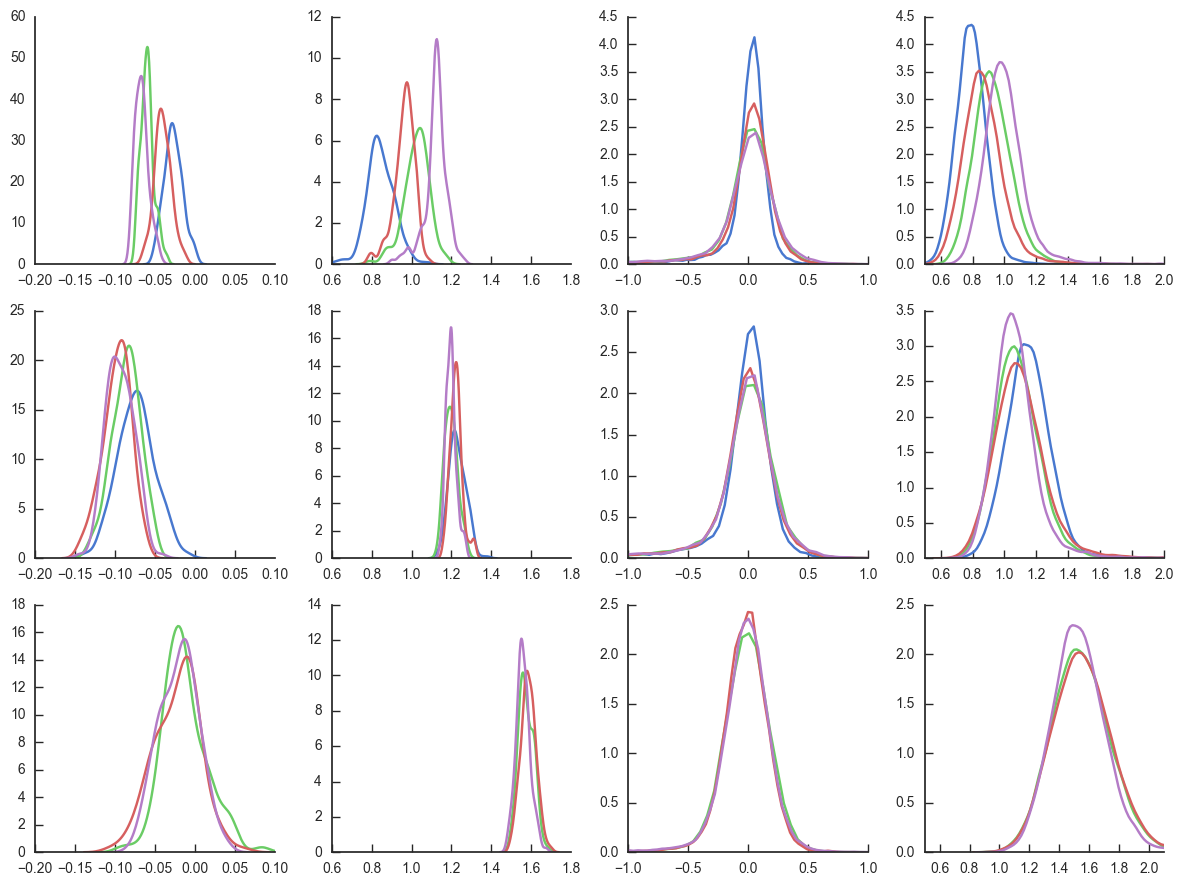

In [49]:
#supplementary figure 2
import seaborn as sns
plt.figure(figsize=(12,9))
col = sns.color_palette("muted", 4)
plt.subplot(3,4,1)
sns.set_style('white')
sns.set_style('ticks')
plt.tick_params(direction='in')
sns.despine()
plt.tight_layout()
for i in range(4):
    sns.distplot([np.mean(np.array(Zpartial_Upmatrices[i])[s][np.triu_indices(number,1)]) for s in range(len(Zpartial_Upmatrices[i]))], hist=False,color=col[i])#label=NeuroIMAGE[i],
    plt.xlim([-0.2,0.1])
plt.subplot(3,4,2)
sns.set_style('white')
sns.set_style('ticks')
plt.tick_params(direction='in')
sns.despine()
plt.tight_layout()
for i in range(4):
    sns.distplot([np.std(np.array(Zpartial_Upmatrices[i])[s][np.triu_indices(number,1)]) for s in range(len(Zpartial_Upmatrices[i]))], hist=False,color=col[i])#label=NeuroIMAGE[i],
    plt.xlim([0.6,1.8])
plt.subplot(3,4,3)
sns.set_style('white')
sns.set_style('ticks')
plt.tick_params(direction='in')
sns.despine()
plt.tight_layout()
for i in range(4):
    sns.distplot(np.mean(np.array(Zpartial_Upmatrices[i]*np.sqrt(len(Upmatrices[i]))),0)[np.triu_indices(number,1)], hist=False,color=col[i])#label=NeuroIMAGE[i],
    plt.xlim([-1,1])
plt.subplot(3,4,4)
sns.set_style('white')
sns.set_style('ticks')
plt.tick_params(direction='in')
sns.despine()
plt.tight_layout()
for i in range(4):
    sns.distplot(np.std(np.array(Zpartial_Upmatrices[i]*np.sqrt(len(Upmatrices[i]))),0)[np.triu_indices(number,1)], hist=False,color=col[i])#label=NeuroIMAGE[i],
    plt.xlim([0.5,2])
    
plt.subplot(3,4,5)
sns.set_style('white')
sns.set_style('ticks')
plt.tick_params(direction='in')
sns.despine()
plt.tight_layout()
for i in range(4):
    sns.distplot([np.mean(np.array(UpmatricesIni[i])[s][np.triu_indices(number,1)]) for s in range(len(Zpartial_Upmatrices[i]))], hist=False,color=col[i])#label=NeuroIMAGE[i],
    plt.xlim([-0.2,0.1])
plt.subplot(3,4,6)
sns.set_style('white')
sns.set_style('ticks')
plt.tick_params(direction='in')
sns.despine()
plt.tight_layout()
for i in range(4):
    sns.distplot([np.std(np.array(UpmatricesIni[i])[s][np.triu_indices(number,1)]) for s in range(len(Zpartial_Upmatrices[i]))], hist=False,color=col[i])#label=NeuroIMAGE[i],
    plt.xlim([0.6,1.8])
plt.subplot(3,4,7)
sns.set_style('white')
sns.set_style('ticks')
plt.tick_params(direction='in')
sns.despine()
plt.tight_layout()
for i in range(4):
    sns.distplot(np.mean(np.array(UpmatricesIni[i]*np.sqrt(len(Upmatrices[i]))),0)[np.triu_indices(number,1)], hist=False,color=col[i])#label=NeuroIMAGE[i],
    plt.xlim([-1,1])
plt.subplot(3,4,8)
sns.set_style('white')
sns.set_style('ticks')
plt.tick_params(direction='in')
sns.despine()
plt.tight_layout()
for i in range(4):
    sns.distplot(np.std(np.array(UpmatricesIni[i]*np.sqrt(len(Upmatrices[i]))),0)[np.triu_indices(number,1)], hist=False,color=col[i])#label=NeuroIMAGE[i],
    plt.xlim([0.5,2])
    
plt.subplot(3,4,9)
sns.set_style('white')
sns.set_style('ticks')
plt.tick_params(direction='in')
sns.despine()
plt.tight_layout()
for i in range(1,4):
    sns.distplot([np.mean(np.array(Upmatrices[i])[s][np.triu_indices(number,1)]) for s in range(len(Zpartial_Upmatrices[i]))], hist=False,color=col[i])#label=NeuroIMAGE[i],
    plt.xlim([-0.2,0.1])
plt.subplot(3,4,10)
sns.set_style('white')
sns.set_style('ticks')
plt.tick_params(direction='in')
sns.despine()
plt.tight_layout()
for i in range(1,4):
    sns.distplot([np.std(np.array(Upmatrices[i])[s][np.triu_indices(number,1)]) for s in range(len(Zpartial_Upmatrices[i]))], hist=False,color=col[i])#label=NeuroIMAGE[i],
    plt.xlim([0.6,1.8])
plt.subplot(3,4,11)
sns.set_style('white')
sns.set_style('ticks')
plt.tick_params(direction='in')
sns.despine()
plt.tight_layout()
for i in range(1,4):
    sns.distplot(np.mean(np.array(Upmatrices[i]*np.sqrt(len(Upmatrices[i]))),0)[np.triu_indices(number,1)], hist=False,color=col[i])#label=NeuroIMAGE[i],
    plt.xlim([-1,1])
plt.subplot(3,4,12)
sns.set_style('white')
sns.set_style('ticks')
plt.tick_params(direction='in')
sns.despine()
plt.tight_layout()
for i in range(1,4):
    sns.distplot(np.std(np.array(Upmatrices[i]*np.sqrt(len(Upmatrices[i]))),0)[np.triu_indices(number,1)], hist=False,color=col[i])#label=NeuroIMAGE[i],
    plt.xlim([0.5,2.1])

    

plt.tight_layout()
plt.savefig('/'+fold+'/'+np.str(number)+'/SM_potencydescription.pdf')
plt.show()

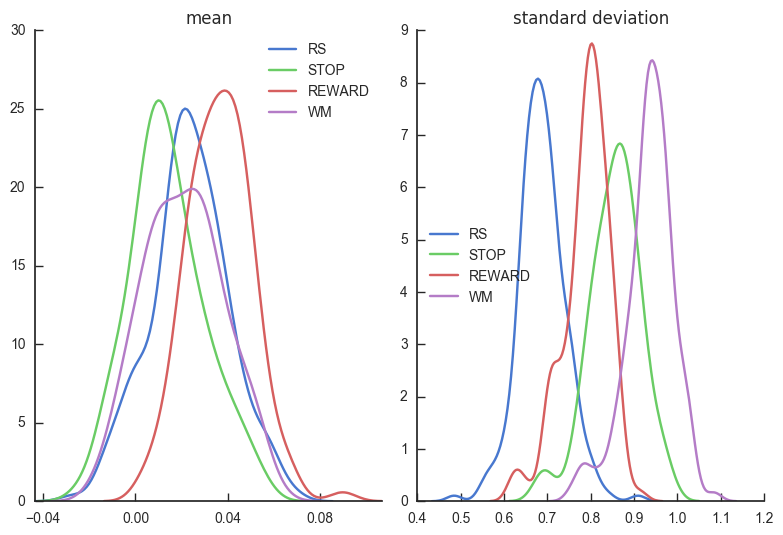

In [50]:
#supplementary figure 2
for i in range(4):
    sd=[((Zpartial_Upmatrices[i][s][15][100]-Zpartial_Upmatrices[i][s][5][10])/UpmatricesIni[i][s][15][100])/(1-(UpmatricesIni[i][s][5][10])/UpmatricesIni[i][s][15][100]) for s in range(len(UpmatricesIni[i]))]
    plt.subplot(1,2,2)
    sns.distplot(sd, hist=False,label=NeuroIMAGE[i],color=col[i])
    plt.title('standard deviation')
    plt.subplot(1,2,1)
    sns.distplot([(Zpartial_Upmatrices[i][s][5][10]-sd[s]*UpmatricesIni[i][s][5][10]) for s in range(len(UpmatricesIni[i]))], hist=False,label=NeuroIMAGE[i],color=col[i])
    plt.title('mean')
    plt.xticks([-0.04,0,0.04,0.08])
plt.subplot(1,2,1)
sns.set_style('white')
sns.set_style('ticks')
plt.tick_params(direction='in')
sns.despine()
plt.tight_layout()
plt.subplot(1,2,2)
sns.set_style('white')
sns.set_style('ticks')
plt.tick_params(direction='in')
sns.despine()
plt.tight_layout()
plt.savefig('/'+fold+'/'+np.str(number)+'/SM_potencymixturemodel.pdf')
plt.show()

# group level selection

In [51]:
med2=np.ones((len(NeuroIMAGE),number,number))

if cond=='11regions' or cond=='184' or cond=='179' or cond=='165':
    p=np.triu_indices(number,1)#np.where(Upmatpval2[i]!=0.05)
elif cond=='average':
    p=np.triu_indices(number)
#mean across population
UpmatMean2=np.array([np.mean(np.array(Upmatrices[i]*np.sqrt(len(UpmatricesIni[i]))),0) for i in range(len(NeuroIMAGE))])
UpmatStd2=np.array([np.std(np.array(Upmatrices[i]*np.sqrt(len(UpmatricesIni[i]))),0) for i in range(len(NeuroIMAGE))])
UpmatZ=np.array([(UpmatMean2[i]-np.mean(UpmatMean2[i]))/np.std(UpmatMean2[i]) for i in range(len(NeuroIMAGE))])
med2[np.where(np.abs(UpmatZ)>=2.3)]=0.0


/home/mrstats/maamen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/mrstats/maamen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [52]:
#figure 4 and supplementary figure 3: group-average potency
for i in range(len(NeuroIMAGE)):
    matdownprov=uplevel(UpmatMean2[i],1)
    matupprov=UpmatMean2[i]
    percent=[-2.3,2.3]
    plotdoublemat(matupprov,matdownprov,'double_Mean_'+NeuroIMAGE[i],percent[0],percent[1],color='coolwarm')
    

double_Mean_RS
double_Mean_STOP
double_Mean_REWARD
double_Mean_WM


# behavioral values


In [53]:
#stop signal reaction time and reaction time variability
myquery2= """SELECT Daan_Data.Subjects,  Daan_Data.RTV, Daan_Data.SSRT
    FROM
    Daan_Data"""


allinfo_behav = rc_GetInfoFromDb.get_query(myquery2,['subject','RTV','SSRT'],"image_private")#, 'RT'
for s in allinfo_behav.keys():
    if allinfo_behav[s]['RTV']==None:
        del allinfo_behav[s]

stopIndex=[[] for t in range(len(data))]
stopRTV=[[] for t in range(len(data))]
stopSSRT=[[] for t in range(len(data))]
for t in range(len(suj)):
    for i in range(len(suj[t])):
        if suj[t][i] in allinfo_behav.keys():
            stopIndex[t].append(i)
            stopRTV[t].append(allinfo_behav[suj[t][i]]['RTV'])
            stopSSRT[t].append(allinfo_behav[suj[t][i]]['SSRT'])
np.save('/stopIndex',stopIndex)#file available
np.save('/stopRTV',stopRTV)#file available
np.save('/stopSSRT',stopSSRT)#file available

####################
####################
#REWARD reaction time difference
myquery2= """SELECT NPO_Reward.Subject,  NPO_Reward.DiffRT
    FROM
    NPO_Reward"""



allinfo_behav = rc_GetInfoFromDb.get_query(myquery2,['subject','RTdiff'],"danvrhe")
for s in allinfo_behav.keys():
    if allinfo_behav[s]['RTdiff']==None:
        del allinfo_behav[s]

rewardIndex=[[] for t in range(len(data))]
rewardRTdiff=[[] for t in range(len(data))]
for t in range(len(suj)):
    for i in range(len(suj[t])):
        if suj[t][i] in allinfo_behav.keys():
            rewardIndex[t].append(i)
            rewardRTdiff[t].append(allinfo_behav[suj[t][i]]['RTdiff'])
np.save('/rewardIndex',rewardIndex)#file available
np.save('/rewardRTdiff',rewardRTdiff)#file available

####################
####################

wm=open('/WMperformance2.txt','r').read().split()
wm=np.reshape(wm,(len(wm)/2,2))


wmIndex=[[] for t in range(len(data))]
wmPerf=[[] for t in range(len(data))]
for t in range(len(suj)):
    for i in range(len(suj[t])):
        if suj[t][i] in wm.T[0]:
            wmIndex[t].append(i)
            wmPerf[t].append(np.float(wm[np.where(wm.T[0]==suj[t][i])][0][1]))
np.save('/wmIndex',wmIndex)#file available
np.save('/wmPerf',wmPerf)#file available



# subject level selection

In [54]:
import nibabel


# subject level selection of edge
p=np.triu_indices(number,1)

Upmatselect=[[] for t in range(len(NeuroIMAGE))]
for t in range(len(NeuroIMAGE)):
    Upmatselect[t]=np.zeros((len(Upmatrices[t]),number,number))
    for s in range(len(Upmatrices[t])):
        [mprov,stdprov]=[np.mean(Upmatrices[t][s][p]),np.std(Upmatrices[t][s][p])]
        Upmatselect[t][s][np.where(np.abs((Upmatrices[t][s]-mprov)/stdprov)>2.3)]=1



# selection on zscore

In [55]:
#for the group selection (fingerprint)
provZ=np.array([UpmatZ[t] for t in range(1,4)])
provZ[np.where(np.abs(provZ)<=2.3)]=0

In [56]:
#all selected edges )positive and negative()
provZALL=np.abs(np.sign(provZ))

## differeciation of edges a modulated by one or all tasks (belong to common processing or specific processing)

In [57]:
### 1) defining a matrix for common processing (2 or 3 tests identical)
common=np.zeros((number,number))
commonVal=np.zeros((number,number))
### 20 and thoe for the specific pattern
specificALL=np.zeros((3,number,number))

In [58]:
def cohensd(a,b):
    return np.abs(np.mean(a)-np.mean(b))/np.sqrt(((len(a)-1)*np.std(a)**2+(len(b)-1)*np.std(b)**2)/(len(a)+len(b)-2))

In [59]:

#the unique one
import scipy.stats

for i in range(3):
    specificALL[i][np.where((np.sum(provZALL,0)*provZALL[i])==1)]=1

loc=np.where((np.sum(provZALL,0))==3)
common[loc]=1
for p in range(len(loc[0])):
    i=[loc[0][p],loc[1][p]]
    commonVal[i[0]][i[1]]=np.abs(np.mean(np.concatenate([[np.array(Upmatrices[t]).T[i[1]][i[0]]] for t in range(1,4)],axis=1)))
common2=np.zeros((3,number,number))
for t in range(3):
    common2[t][np.where(provZALL[t]!=0)]=1
    common2[t][np.where(common!=0)]=0
    common2[t][np.where(specificALL[t]!=0)]=0

In [60]:
potencycondition=np.zeros((5,number,number))#common, specific stop,rew,wm,indiferentiated
commonVal=np.zeros((number,number))
#the unique one
import scipy.stats
for i in range(3):
    potencycondition[i+1][np.where(specificALL[i]!=0)]=1
#compare those several time selected :
#2time
loc=np.where(np.sum(np.abs(provZALL),0)==2)
for p in range(len(loc[0])):
    i=[loc[0][p],loc[1][p]]
    tasks=[j for j in range(3) if np.abs(provZALL[j][i[0]][i[1]])==1]

    if cohensd([y[i[0]][i[1]] for y in (Upmatrices*np.sqrt(len(UpmatricesIni[tasks[0]+1])))[tasks[0]+1]],[y[i[0]][i[1]] for y in (Upmatrices*np.sqrt(len(UpmatricesIni[tasks[1]+1])))[tasks[1]+1]])>=0.3: #scipy.stats.ttest_ind(Upmatrices[tasks[0]+1][:][i[0]][i[1]],Upmatrices[tasks[1]+1][:][i[0]][i[1]])[1]<=0.05:
        print i,tasks
        potencycondition[tasks[0]+1][i[0]][i[1]]=1
        potencycondition[tasks[1]+1][i[0]][i[1]]=1
    else:
        #print cohensd(Upmatrices[tasks[0]+1][:][i[0]][i[1]],Upmatrices[tasks[1]+1][:][i[0]][i[1]])
        potencycondition[4][i[0]][i[1]]=1
        test=[[np.abs(g[i[0]][i[1]]) for g in (Upmatrices*np.sqrt(len(UpmatricesIni[tasks[0]+1])))[tasks[0]+1]],[np.abs(g[i[0]][i[1]]) for g in (Upmatrices*np.sqrt(len(UpmatricesIni[tasks[1]+1])))[tasks[1]+1]]]
        commonVal[i[0]][i[1]]=np.mean([test[0][0],test[0][1]])
#3times
loc=np.where(np.sum(np.abs(provZALL),0)==3)
for p in range(len(loc[0])):
    i=[loc[0][p],loc[1][p]]
    tasks=[cohensd([y[i[0]][i[1]] for y in Upmatrices[1]*np.sqrt(len(UpmatricesIni[1]))],[y[i[0]][i[1]] for y in Upmatrices[2]*np.sqrt(len(UpmatricesIni[2]))])>=0.3,cohensd([y[i[0]][i[1]] for y in Upmatrices[1]*np.sqrt(len(UpmatricesIni[1]))],[y[i[0]][i[1]] for y in Upmatrices[3]*np.sqrt(len(UpmatricesIni[3]))])>=0.3,cohensd([y[i[0]][i[1]] for y in Upmatrices[2]*np.sqrt(len(UpmatricesIni[2]))],[y[i[0]][i[1]] for y in Upmatrices[3]*np.sqrt(len(UpmatricesIni[3]))])>=0.3]
    if tasks[0] and tasks[1] and tasks[2]:
        potencycondition[1][i[0]][i[1]]=1
        potencycondition[2][i[0]][i[1]]=1
        potencycondition[3][i[0]][i[1]]=1
        print i,'all'
    else:
        test=[[[np.abs(y[i[0]][i[1]]) for y in Upmatrices[j[0]]*np.sqrt(len(UpmatricesIni[j[0]]))],[np.abs(y[i[0]][i[1]]) for y in Upmatrices[j[1]]*np.sqrt(len(UpmatricesIni[j[1]]))]] for e,j in enumerate([[1,2],[1,3],[2,3]]) if not tasks[e]]
        commonVal[i[0]][i[1]]=np.mean(np.concatenate([test[0][h] for h in range(len(test[0]))],axis=0))
        
        if np.sum(tasks)==2:
            potencycondition[4][i[0]][i[1]]=1
            print i,'2'
            
            if tasks==[True,True,False]:
                potencycondition[1][i[0]][i[1]]=1
            
            elif tasks==[True,False,True]:
                potencycondition[2][i[0]][i[1]]=1
            
            elif tasks==[False,True,True]:
                potencycondition[3][i[0]][i[1]]=1
        else:#np.sum=1 or 0
        
            potencycondition[0][i[0]][i[1]]=1
        
        

commonVal=np.abs(commonVal)

/home/mrstats/maamen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/mrstats/maamen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


[0, 11] [1, 2]
[0, 12] [1, 2]
[2, 11] [1, 2]
[4, 5] [1, 2]
[5, 4] [1, 2]
[11, 0] [1, 2]
[11, 2] [1, 2]
[12, 0] [1, 2]


/home/mrstats/maamen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:27: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/mrstats/maamen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:34: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


[0, 3] 2
[2, 3] all
[3, 0] 2
[3, 2] all
[5, 7] 2
[5, 8] 2
[5, 9] 2
[7, 5] 2
[8, 5] 2
[9, 5] 2
[10, 36] 2
[11, 12] all
[12, 11] all
[18, 19] 2
[19, 18] 2
[31, 126] 2
[36, 10] 2
[42, 104] 2
[46, 66] 2
[55, 68] 2
[60, 67] 2
[66, 46] 2
[67, 60] 2
[67, 69] 2
[67, 175] 2
[68, 55] 2
[69, 67] 2
[72, 79] 2
[79, 72] 2
[79, 103] 2
[96, 97] 2
[97, 96] 2
[103, 79] 2
[104, 42] 2
[111, 112] 2
[112, 111] 2
[126, 31] 2
[140, 141] 2
[141, 140] 2
[150, 152] 2
[152, 150] 2
[157, 161] 2
[157, 163] 2
[161, 157] 2
[163, 157] 2
[175, 67] 2


In [62]:
def plotslicesZ(brainVal,ortho='z',cut_coords=20,axes=None,reduc=1,title='',col=''):
    import nilearn.plotting
    import nilearn.image   
    from nilearn.plotting import plot_roi, plot_stat_map
    from nilearn.image.image import mean_img
    import nibabel
    import seaborn as sns
    
    pal=np.concatenate([sns.color_palette("deep",6),sns.color_palette("pastel",6)],axis=0)
    if atlas=='ICPAtlas_v3_2':
        N=np.array([12,21,18,20,23,17,13,27,14])
    else:
        N=[20,11,22,22,18,8,18,13,7,17,23] 
    if col=='':
        pal2=np.concatenate([[pal[i] for j in range(N[i])] for i in range(number2)],axis=0)
        col2=[sns.light_palette(i, as_cmap=True) for i in pal2]
    else:
        pal2=col
    initialcol='Greys'
    
    atlasname='/'
    j=0
    func_filename = atlasname+'atlas_complete_GM_1mm_4Dwithout149_152_155_158_159_160.nii.gz'
    mean_epi = nibabel.load(func_filename)
    mean_epi_dat=mean_epi.get_data()
    mean_epi_dat=mean_epi_dat.T
    
    for j in range(mean_epi_dat.shape[0]):
        if brainVal[j]/np.max(brainVal)==0:
            mean_epi_dat[j]=0
    mean_epi_dat=np.sign(np.sum(mean_epi_dat,0)).T
    
    func=nibabel.nifti1.Nifti1Image(mean_epi_dat,mean_epi.get_affine())
        
    brain=nilearn.plotting.plot_roi(func, func,colorbar=False,cut_coords=cut_coords,display_mode=ortho,alpha=1,draw_cross=False,cmap=initialcol,black_bg=False,axes=axes,annotate=False)
    if title!='':
        brain.title(title,size=15./reduc,color=(0,0,0),bgcolor=(1,1,1))
    j=0
    func_filename = atlasname+'atlas_complete_GM_1mm_4Dwithout149_152_155_158_159_160.nii.gz'
    
    atlas_imgs=nilearn.image.iter_img(func_filename)
    
    if reduc==1:
        lineW=1
    else:
        lineW=1./reduc
    for img in atlas_imgs:
        if brainVal[j]/np.max(brainVal)!=0:
            mean_epi = mean_img(img)
            img3=img
            
            img2=nilearn.image.smooth_img(mean_epi,1)
            brain.add_contours(img2,filled=True,levels=[0.02],cmap=None,colors=[[pal2[j][0],pal2[j][1],pal2[j][2]]],linewidths=lineW,alpha=brainVal[j]/np.max(brainVal))
            
        j+=1
    brain.add_contours(nilearn.image.smooth_img('/MNI152_T1_1mm_brain.nii.gz',5),alpha=1, levels=[95],linewidths=lineW, cmap=sns.dark_palette('w', as_cmap=True),)#color='w',levels=[95,50]        
    brain.add_contours(nilearn.image.smooth_img('/MNI152_T1_1mm_brain.nii.gz',0.5),alpha=0.8, levels=[5000],linewidths=lineW)
    brain.annotate(left_right=False,size=int(12*lineW))
    
def plot12braincut(brainVal,cut_coords='',title=''):
    if cut_coords=='':
        cut_coords1=[-45,-36,-27,-18,-9,0]
        cut_coords2=[9,18,27,36,45,54]
    else:
        cut_coords1=cut_coords[:len(cut_coords)/2]
        cut_coords2=cut_coords[len(cut_coords)/2:]
        
    fig=plt.figure(figsize=(6,2))
    ax1=plt.subplot(211)
    plotslicesZ(brainVal,'z',cut_coords1,ax1,reduc=2,title='')
    ax2=plt.subplot(212)
    plotslicesZ(brainVal,'z',cut_coords2,ax2,reduc=2,title='')
    
def plot12braincut_uni(brainVal,cut_coords='',title='',col=''):
    if col=='':
        col=['b' for i in range(number)]
    if cut_coords=='':
        cut_coords1=[-45,-36,-27,-18,-9,0]
        cut_coords2=[9,18,27,36,45,54]
    else:
        cut_coords1=cut_coords[:len(cut_coords)/2]
        cut_coords2=cut_coords[len(cut_coords)/2:]
        
    fig=plt.figure(figsize=(6,2))
    ax1=plt.subplot(211)
    plotslicesZ(brainVal,'z',cut_coords1,ax1,reduc=2,title='',col=col)
    ax2=plt.subplot(212)
    plotslicesZ(brainVal,'z',cut_coords2,ax2,reduc=2,title='',col=col)

In [63]:
def plotZslices_alloption(niftipath,ortho='z',cut_coords='',Nraw=1,smoothing=0,LR=False,outdir='',
                colorpos='r',colorneg='b',Zannotate=False,thresholdpos='def',Zannotates='def',thresholdneg=False,alphamap=1,alphabrain=1 ,title=''):
    "niftipath: path to the nifti file, can be a 3D - if activation map, specify thresholds,"
    "cut_coords can be a int as the number of zslices to display of a list of slices number (in MNI) (even list of one to get one specific slice)"
    "Nraw: the number of raw"
    "smoothing: number of voxel to smooth; LR:annotate left and right"
    "outdir:path to save the file"
    "color:list of color for each volume, or only one color, neg or pos if corresponding threshold to display"
    "Zannotate : Number=annotate z number, False=not annotate, Brain=on a X slice, with lign, or Both"
    "thresholdpos: specify threshold to cut and see above (can be a list for activation map: layer effect) or False will not be displayed or 'def' as 0.5 on normalized file"
    "thresholdneg: specify threshold to cut and see bellow (can be a list for activation map: layer effect) or False will not be displayed "
    import matplotlib.pyplot as plt
    import numpy as np
    import nilearn.plotting
    import nilearn.image   
    from nilearn.plotting import plot_roi, plot_stat_map
    from nilearn.plotting.find_cuts import find_cut_slices
    from nilearn.image.image import mean_img
    import nibabel
    import seaborn as sns
    initialcol=sns.light_palette((0,0,0), as_cmap=True)#'Greys'
    data=nibabel.load(niftipath)
    datasize=data.get_shape()
    lineW=1./(Nraw+int((Zannotate=='Brain' or Zannotate=='Both')))
    if type(cut_coords)==int or cut_coords=='':
        if cut_coords=='':
            cut_coords=6
        #find best cut
        if len(datasize)==4:
            cut_coords=find_cut_slices(mean_img(nibabel.nifti1.Nifti1Image(np.sign(np.abs(data.get_data())),data.get_affine())), n_cuts=cut_coords)
        else:
            
            cut_coords=find_cut_slices(data, n_cuts=cut_coords)
    #split in raw
    if cut_coords!=(0,0,0):
        cut_coords=np.array(cut_coords)
        cc=cut_coords
        cut_coords=[cut_coords[i*len(cut_coords)/np.float(Nraw):(i+1)*len(cut_coords)/np.float(Nraw)] for i in range(Nraw)]
    else:
        cut_coords=[cut_coords]
    #define color:
    if type(colorneg)==str:
        colorneg=[colorneg]
    if type(colorpos)==str:
        colorpos=[colorpos]
    if len(datasize)==4 and len(colorpos)!=datasize[3]:
        provcol=colorpos[len(colorpos)-1]
        colorpos=np.concatenate([colorpos,[provcol for i in range(datasize[3]-len(colorpos))]])
    if len(datasize)==4 and len(colorneg)!=datasize[3]:
        provcol=colorneg[len(colorneg)-1]
        colorneg=np.concatenate([colorneg,[provcol for i in range(datasize[3]-len(colorneg))]])

    #adjust threshold
    if thresholdpos=='def':
        data=nibabel.nifti1.Nifti1Image(data.get_data()/np.float(np.max(data.get_data())),data.get_affine())
        thresholdpos=[0.5]
    #thresold organized:
    if type(thresholdpos)!=np.bool: thresholdpos=[i for i in np.sort(thresholdpos)]
    if type(thresholdneg)!=np.bool: thresholdneg=[i for i in -np.sort(-1*np.array(thresholdneg))]
    func=mean_img(nibabel.nifti1.Nifti1Image(np.sign(np.abs(data.get_data())),data.get_affine()))
    
    ####################subplot
    for i in range(Nraw):
        
        ax=plt.subplot(Nraw+int((Zannotate=='Brain' or Zannotate=='Both')),1,i+1)

        brain=nilearn.plotting.plot_roi(nibabel.nifti1.Nifti1Image(np.zeros(func.get_shape()),data.get_affine()), nibabel.nifti1.Nifti1Image(np.zeros(func.get_shape()),data.get_affine()),colorbar=False,cut_coords=cut_coords[i],display_mode=ortho,alpha=1,draw_cross=False,cmap=initialcol,black_bg=False,axes=ax,annotate=False)
        
        if len(datasize)==3:
            iter_imgs=[data]
        else:
            iter_imgs=nilearn.image.iter_img(niftipath)
        ###############plot the volumes
        j=0
        
        for img in iter_imgs:
            
            
            if thresholdpos!=False:
                colorprovpos=sns.light_palette(colorpos[j],len(thresholdpos),reverse=True)[::-1]
            
                kn=0
                img2=nilearn.image.smooth_img(img,smoothing)
                
                for k in thresholdpos:
                    
                    brain.add_contours(img2,filled=True,levels=[k],cmap=None,colors=[[colorprovpos[kn][0],colorprovpos[kn][1],colorprovpos[kn][2]]],linewidths=lineW,alpha=k/np.max(thresholdpos))#alphamap)
                    #brain.add_contours(trickimage(img2,k),filled=True,levels=[0],cmap=None,colors=[[colorprovpos[kn][0],colorprovpos[kn][1],colorprovpos[kn][2]]],linewidths=lineW,alpha=k/np.max(thresholdpos))#alphamap)
                    kn+=1
            if thresholdneg!=False:
                colorprovneg=sns.light_palette(colorneg[j],len(thresholdneg),reverse=True)[::-1]
                kn=0
                img2=nibabel.nifti1.Nifti1Image(-1*nilearn.image.smooth_img(img,smoothing).get_data(),data.get_affine())
                for k in thresholdneg:
                    #brain.add_contours(trickimage(img2,k),filled=True,levels=[0],cmap=None,colors=[[colorprovneg[kn][0],colorprovneg[kn][1],colorprovneg[kn][2]]],linewidths=lineW,alpha=alphamap)
                    brain.add_contours(img2,filled=True,levels=[k],cmap=None,colors=[[colorprovneg[kn][0],colorprovneg[kn][1],colorprovneg[kn][2]]],linewidths=lineW,alpha=alphamap)
                    kn+=1
            j+=1
        brain.add_contours(nilearn.image.smooth_img('/MNI152_T1_1mm_brain.nii.gz',5),alpha=1*alphabrain, levels=[95],linewidths=lineW, cmap=sns.dark_palette('w', as_cmap=True),)       
        brain.add_contours(nilearn.image.smooth_img('/MNI152_T1_1mm_brain.nii.gz',0.5),alpha=0.8*alphabrain, levels=[5000],linewidths=lineW)
        if Zannotate=='Both' or Zannotate=='Number' :
            brain.annotate(left_right=LR,size=int(12*lineW))
        
        print 'raw '+str(i)+' ready'
    ##########################plot the X brain
    if Zannotate=='Brain' or Zannotate=='Both':
        print 'doing annotate X slice'
        ax=plt.subplot(Nraw+1,1,Nraw+1)
        if len(datasize)==4:
            cut_coords=find_cut_slices(mean_img(nibabel.nifti1.Nifti1Image(np.sign(np.abs(data.get_data())),data.get_affine())), n_cuts=1,direction='x')
        else:
            
            cut_coords=find_cut_slices(data, n_cuts=1,direction='x')
        
        #plot the Xbrain
        brain=nilearn.plotting.plot_roi(nibabel.nifti1.Nifti1Image(np.zeros(func.get_shape()),data.get_affine()), nibabel.nifti1.Nifti1Image(np.zeros(func.get_shape()),data.get_affine()),colorbar=False,cut_coords=cut_coords,display_mode='x',alpha=1,draw_cross=False,cmap=initialcol,black_bg=False,axes=ax,annotate=False)
        
        if Zannotate=='Both' or Zannotate=='Number' :
            brain.annotate(left_right=LR,size=int(12*lineW))

        if len(datasize)==3:
            iter_imgs=[data]
        else:
            iter_imgs=nilearn.image.iter_img(niftipath)
        ###############plot the volumes
        j=0
        for img in iter_imgs:
            if thresholdpos!=False:
                colorprovpos=sns.light_palette(colorpos[j],len(thresholdpos),reverse=True)[::-1]
                kn=0
                img2=nilearn.image.smooth_img(img,smoothing)
                for k in thresholdpos:
                    brain.add_contours(img2,filled=True,levels=[k],cmap=None,colors=[[colorprovpos[kn][0],colorprovpos[kn][1],colorprovpos[kn][2]]],linewidths=lineW,alpha=alphamap)
                    kn+=1
            if thresholdneg!=False:
                colorprovneg=sns.light_palette(colorneg[j],len(thresholdneg),reverse=True)[::-1]
                kn=0
                img2=nibabel.nifti1.Nifti1Image(-1*nilearn.image.smooth_img(img,smoothing).get_data(),data.get_affine())
                for k in thresholdneg:
                    brain.add_contours(img2,filled=True,levels=[k],cmap=None,colors=[[colorprovneg[kn][0],colorprovneg[kn][1],colorprovneg[kn][2]]],linewidths=lineW,alpha=alphamap)
                    kn+=1
            j+=1
        brain.add_contours(nilearn.image.smooth_img('/MNI152_T1_1mm_brain.nii.gz',5),alpha=1*alphabrain, levels=[95],linewidths=lineW, cmap=sns.dark_palette('w', as_cmap=True),)       
        brain.add_contours(nilearn.image.smooth_img('/MNI152_T1_1mm_brain.nii.gz',0.5),alpha=0.8*alphabrain, levels=[5000],linewidths=lineW)
        for i in cc:
        
            ax.plot([-100, 100], [i, i], 'k-',lw=lineW)#/(85.+73.)
            
        ax.axis((-300.0, 300.0, -80.0, 110.0))   
    if title!='':
        plt.title(title)
    if outdir!='':
        plt.savefig(outdir,dpi=300)
    else:
        return ax#plt.show()

In [64]:
def plot3x4braincut(brainVal,cut_coords='',title=''):
    if cut_coords=='':
        cut_coords1=[-45,-36,-27]
        cut_coords2=[-18,-9,0]
        cut_coords3=[9,18,27]
        cut_coords4=[36,45,54]
    else:
        cut_coords1=cut_coords[:len(cut_coords)/4]
        cut_coords2=cut_coords[len(cut_coords)/4:len(cut_coords)/2]
        cut_coords3=cut_coords[len(cut_coords)/2:len(cut_coords)/4*3]
        cut_coords4=cut_coords[len(cut_coords)/4*3:]
        
    fig=plt.figure(figsize=(3,4))
    ax1=plt.subplot(411)
    plotslicesZ(brainVal,'z',cut_coords1,ax1,reduc=4,title='')
    ax2=plt.subplot(412)
    plotslicesZ(brainVal,'z',cut_coords2,ax2,reduc=4,title='')
    ax3=plt.subplot(413)
    plotslicesZ(brainVal,'z',cut_coords3,ax3,reduc=4,title='')
    ax4=plt.subplot(414)
    plotslicesZ(brainVal,'z',cut_coords4,ax4,reduc=4,title='')
def plot3x4braincutCONCEPT(brainVal,cut_coords='',title=''):
    if cut_coords=='':
        cut_coords=[-45,-36,-27,-18,-9,0,9,18,27,36,45,54]
    col = sns.color_palette("muted", int(np.max(brainVal)+1))
    
    
    col[4] = col[5]
    col[np.int(np.max(brainVal))-1]=[1,1,1]
    print col
    listcol=[col[i-1] for i in brainVal]
    if atlas=='ICPAtlas_v3_2':
        plotZslices_alloption('/ICPAtlas_v3_2mm_4D.nii.gz',cut_coords=cut_coords,colorpos=listcol, Nraw=4,outdir=title, smoothing=1, thresholdpos=[0.02],Zannotate='Number')
    else:
        plotZslices_alloption('/atlas_complete_GM_1mm_4Dwithout149_152_155_158_159_160.nii.gz',cut_coords=cut_coords,colorpos=listcol, Nraw=4,outdir=title, smoothing=1, thresholdpos=[0.02],Zannotate='Number')
    

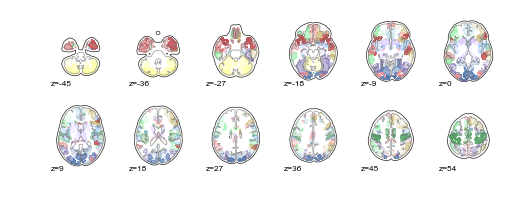

In [65]:
# visualization of brainmap corresponding to edges modulated by all tasks
tri=np.zeros((number,number))
tri[np.triu_indices(number,1)]=1
keep=common*tri+(common*tri).T
vec=np.sum(np.abs(keep),0)
OrderRestRev = numpy.argsort(orderrest2)
vec=vec[OrderRestRev]
plot12braincut(vec,cut_coords='',title='commonarea')
plt.savefig('/'+fold+'/'+np.str(number)+'/commonarea.pdf')
plt.show()


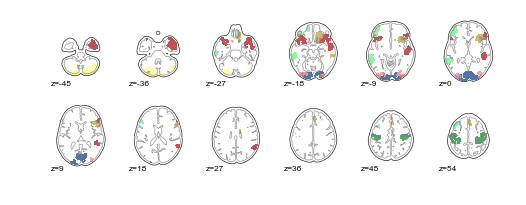

In [66]:
# figure 7 
tri=np.zeros((number,number))
tri[np.triu_indices(number,1)]=1
keep=common*tri+(common*tri).T
vec=np.sum(np.abs(keep),0)
OrderRestRev = numpy.argsort(orderrest2)
vec=vec[OrderRestRev]
ordermax=np.argsort(vec)
vec[ordermax[:len(ordermax)-np.int(len(ordermax)*10/100)]]=0
vec[np.where(vec!=0)]=1
plot12braincut(vec,cut_coords='',title='commonarea10percent')
plt.savefig('/'+fold+'/'+np.str(number)+'/commonarea10percent.pdf')
plt.show()


# Most potent task

In [67]:
#now we want to know who is more potent 
#figure 8A
#for each edges
#searching for highest potentiating edges 
up2=np.abs(np.array([commonVal,UpmatMean2[1],UpmatMean2[2],UpmatMean2[3],commonVal])*potencycondition)
mup2=np.max(up2,0)
for i in range(number):
    for j in range(i+1,number):
        if mup2[i][j]!=0:
            mup2[i][j]=np.where(up2.T[j][i]==mup2[i][j])[0][0]+1
            mup2[j][i]=mup2[i][j]
            


In [68]:
#figure 8A
#for networks
tri=np.zeros((number2,number2))
tri[np.triu_indices(number2,1)]=1
Upmatrices11=np.array([np.array([np.array(uplevel(np.abs(i*provZALL[e-1]),1)) for i in Upmatrices[e]*np.sqrt(len(UpmatricesIni[e]))]) for e in range(1,len(Upmatrices))])
for e in range(len(Upmatrices)-1):
    Upmatrices11[e][np.where(np.isnan(Upmatrices11[e]))]=0

#selection on Zscore
UpmatZ11=np.array([np.abs(np.mean(Upmatrices11[i],0)/np.std(Upmatrices11[i],0)) for i in range(3)])
UpmatZ11[np.where(np.isnan(UpmatZ11))]=0

provZALL11=np.zeros((3,number2,number2))
provZALL11[np.where(UpmatZ11!=0)]=1# i.e. Z>=2.3
for i in range(3):
    provZALL11[i][np.triu_indices(number2)][np.where(UpmatZ11[i][np.triu_indices(number2)]>=2.3)]=1
    provZALL11[i]=np.sign(provZALL11[i]+(provZALL11[i]*tri).T)

potencycondition11=np.zeros((5,number2,number2))#common, specific stop,rew,wm,indiferentiated
commonVal11=np.zeros((number2,number2))
#network selected in only one task have already an assigned most potent task
for i in range(3):
    potencycondition11[i+1][np.where(provZALL11[i]*np.sum(np.abs(provZALL11),0)==1)]=1
    
#compare network selected in more than one task: search if tasks show different different or similar potentiation
#2times
loc=np.where(np.sum(np.abs(provZALL11),0)==2)

for p in range(len(loc[0])):
    i=[loc[0][p],loc[1][p]]
    
    tasks=[j for j in range(3) if np.abs(provZALL11[j][i[0]][i[1]])==1]
    #cohensd between them >=0.3
    if cohensd([y[i[0]][i[1]] for y in Upmatrices11[tasks[0]]],[y[i[0]][i[1]] for y in Upmatrices11[tasks[1]]])>=0.3:
        print i,tasks
        potencycondition11[tasks[0]][i[0]][i[1]]=1
        potencycondition11[tasks[1]][i[0]][i[1]]=1
        potencycondition11[tasks[0]][i[1]][i[0]]=1
        potencycondition11[tasks[1]][i[1]][i[0]]=1
    
    #cohensd between them <0.3: potentiation is similar between both tasks
    else:    
        potencycondition11[4][i[0]][i[1]]=1
        potencycondition11[4][i[1]][i[0]]=1
        test=[[np.abs(g[i[0]][i[1]]) for g in Upmatrices11[tasks[0]]],[np.abs(g[i[0]][i[1]]) for g in Upmatrices11[tasks[1]]]]
        commonVal11[i[0]][i[1]]=np.mean([test[0][0],test[0][1]])
        commonVal11[i[1]][i[0]]=commonVal11[i[0]][i[1]]
#3times
loc=np.where(np.sum(np.abs(provZALL11),0)==3)
for p in range(len(loc[0])):
    i=[loc[0][p],loc[1][p]]
    tasks=[cohensd([y[i[0]][i[1]] for y in Upmatrices11[0]],[y[i[0]][i[1]] for y in Upmatrices11[1]])>=0.3,cohensd([y[i[0]][i[1]] for y in Upmatrices11[0]],[y[i[0]][i[1]] for y in Upmatrices11[2]])>=0.3,cohensd([y[i[0]][i[1]] for y in Upmatrices11[1]],[y[i[0]][i[1]] for y in Upmatrices11[2]])>=0.3]
    #if all tasks show high cohensd difference, each task is potent in a different way
    if tasks[0] and tasks[1] and tasks[2]:
        potencycondition11[1][i[0]][i[1]]=1
        potencycondition11[2][i[0]][i[1]]=1
        potencycondition11[3][i[0]][i[1]]=1
        print i,'all'
        potencycondition11[1][i[1]][i[0]]=1
        potencycondition11[2][i[1]][i[0]]=1
        potencycondition11[3][i[1]][i[0]]=1
    else:
        #other possible combining : two task similar / one different or three tasks similar
        test=[[[np.abs(y[i[0]][i[1]]) for y in Upmatrices11[j[0]]],[np.abs(y[i[0]][i[1]]) for y in Upmatrices11[j[1]]]] for e,j in enumerate([[0,1],[0,2],[1,2]]) if not tasks[e]]
        commonVal11[i[0]][i[1]]=np.mean(np.concatenate([test[0][h] for h in range(len(test[0]))],axis=0))
        commonVal11[i[1]][i[0]]=commonVal11[i[0]][i[1]]
        if np.sum(tasks)==2:
            potencycondition11[4][i[0]][i[1]]=1
            potencycondition11[4][i[1]][i[0]]=1
            print i,'2'
            
            if tasks==[True,True,False]:
                potencycondition11[1][i[0]][i[1]]=1
                potencycondition11[1][i[1]][i[0]]=1
            
            elif tasks==[True,False,True]:
                potencycondition11[2][i[0]][i[1]]=1
                potencycondition11[2][i[1]][i[0]]=1
            
            elif tasks==[False,True,True]:
                potencycondition11[3][i[0]][i[1]]=1
                potencycondition11[3][i[1]][i[0]]=1
        else:
        
            potencycondition11[0][i[0]][i[1]]=1
            potencycondition11[0][i[1]][i[0]]=1
        
        

commonVal11=np.abs(commonVal11)

#searching for highest potentiating networks
low2=np.abs(np.array([commonVal11,np.mean(Upmatrices11[0],0),np.mean(Upmatrices11[1],0),np.mean(Upmatrices11[2],0),commonVal11])*potencycondition11)
mlow2=np.max(low2,0)

for i in range(number2):
    for j in range(i,number2):
        if mlow2[i][j]!=0:
            mlow2[i][j]=np.where(low2.T[j][i]==mlow2[i][j])[0][0]+1
            mlow2[j][i]=mlow2[i][j]
print mlow2

/home/mrstats/maamen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/mrstats/maamen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in divide


[0, 9] [0, 1]
[1, 6] [1, 2]
[3, 5] [0, 1]
[3, 7] [0, 1]
[3, 8] [1, 2]
[3, 9] [0, 1]
[5, 3] [0, 1]
[6, 1] [1, 2]
[6, 9] [0, 1]
[7, 3] [0, 1]
[7, 7] [1, 2]
[7, 9] [0, 2]
[8, 3] [1, 2]
[9, 0] [0, 1]
[9, 3] [0, 1]
[9, 6] [0, 1]
[9, 7] [0, 2]
[0, 0] all
[0, 1] all
[0, 3] all
[0, 7] all
[0, 8] all
[0, 10] 2
[1, 0] all
[1, 1] 2
[1, 2] all
[1, 3] 2
[1, 5] 2
[1, 7] 2
[1, 8] 2
[1, 9] all
[1, 10] 2
[2, 1] all
[2, 2] all
[2, 3] 2
[2, 4] all
[2, 5] all
[2, 6] 2
[2, 8] 2
[2, 9] 2
[2, 10] all
[3, 0] all
[3, 1] 2
[3, 2] 2
[3, 3] 2
[3, 10] all
[4, 2] all
[4, 4] 2
[4, 5] 2
[4, 6] all
[4, 7] all
[4, 8] 2
[4, 9] 2
[4, 10] 2
[5, 1] 2
[5, 2] all
[5, 4] 2
[5, 5] all
[5, 6] 2
[5, 7] all
[5, 8] 2
[5, 9] all
[5, 10] all
[6, 2] 2
[6, 4] all
[6, 5] 2
[6, 6] 2
[6, 7] all
[6, 8] all
[6, 10] 2
[7, 0] all
[7, 1] 2
[7, 4] all
[7, 5] all
[7, 6] all
[7, 8] 2
[8, 0] all
[8, 1] 2
[8, 2] 2
[8, 4] 2
[8, 5] 2
[8, 6] all
[8, 7] 2
[9, 1] all
[9, 2] 2
[9, 4] 2
[9, 5] all
[9, 9] 2
[9, 10] all
[10, 0] 2
[10, 1] 2
[10, 2] all
[10,

In [69]:
#figure 8B
#for area potency
Upmatrices179=np.array([np.array([np.array(np.mean(np.abs(i*np.sqrt(len(UpmatricesIni[e]))-np.diag(i)*np.eye(number))*np.abs(provZALL[e-1]),0)) for i in Upmatrices[e]]) for e in range(1,len(Upmatrices))])
UpmatZ179=np.array([np.abs(np.mean(Upmatrices179[i],0)/np.std(Upmatrices179[i],0)) for i in range(3)])
UpmatZ179[np.where(np.isnan(UpmatZ179))]=0
provZALL179=np.zeros((3,number))
provZALL179[np.where(UpmatZ179!=0)]=1#>=2.3
potencycondition179=np.zeros((5,number))#common, specific stop,rew,wm,indiferentiated
commonVal179=np.zeros(number)
#the unique one
import scipy.stats
for i in range(3):
    potencycondition179[i+1][np.where(provZALL179[i]*np.sum(np.abs(provZALL179),0)==1)]=1
#compare areas selected multiple time:
#2times
loc=np.where(np.sum(np.abs(provZALL179),0)==2)
for i in loc[0]:
    
    tasks=[j for j in range(3) if np.abs(provZALL179[j][i])==1]
    
    if cohensd([y[i] for y in Upmatrices179[tasks[0]]],[y[i] for y in Upmatrices179[tasks[1]]])>=0.3: #scipy.stats.ttest_ind(Upmatrices[tasks[0]+1][:][i[0]][i[1]],Upmatrices[tasks[1]+1][:][i[0]][i[1]])[1]<=0.05:
        print i,tasks
        potencycondition179[tasks[0]+1][i]=1
        potencycondition179[tasks[1]+1][i]=1
    else:
        
        potencycondition179[4][i]=1
        test=[[np.abs(g[i]) for g in Upmatrices179[tasks[0]]],[np.abs(g[i]) for g in Upmatrices179[tasks[1]]]]
        commonVal179[i]=np.mean([test[0][0],test[0][1]])
        
#3times
loc=np.where(np.sum(np.abs(provZALL179),0)==3)
for i in loc[0]:
    
    tasks=[cohensd([y[i] for y in Upmatrices179[0]],[y[i] for y in Upmatrices179[1]])>=0.3,cohensd([y[i] for y in Upmatrices179[0]],[y[i] for y in Upmatrices179[2]])>=0.3,cohensd([y[i] for y in Upmatrices179[1]],[y[i] for y in Upmatrices179[2]])>=0.3]
    
    if tasks[0] and tasks[1] and tasks[2]:
        potencycondition179[1][i]=1
        potencycondition179[2][i]=1
        potencycondition179[3][i]=1
        print i,'all'
    else:
        test=[[[np.abs(y[i]) for y in Upmatrices179[j[0]]],[np.abs(y[i]) for y in Upmatrices179[j[1]]]] for e,j in enumerate([[0,1],[0,2],[1,2]]) if not tasks[e]]
        commonVal179[i]=np.mean(np.concatenate([test[0][h] for h in range(len(test[0]))],axis=0))
        
        if np.sum(tasks)==2:
            potencycondition179[4][i]=1
            print i,'2'
            
            if tasks==[True,True,False]:
                potencycondition179[1][i]=1
            
            elif tasks==[True,False,True]:
                potencycondition179[2][i]=1
            
            elif tasks==[False,True,True]:
                potencycondition179[3][i]=1
        else:#np.sum=1 or 0
        
            potencycondition179[0][i]=1
        
        

commonVal179=np.abs(commonVal179)

#searching for highest potenting tasks
parea=np.abs(np.array([commonVal179,np.mean(Upmatrices179[0],0),np.mean(Upmatrices179[1],0),np.mean(Upmatrices179[2],0),commonVal179])*potencycondition179)
mparea=np.max(parea,0)
print mparea
for i in range(number):
    if mparea[i]!=0:
        mparea[i]=np.where(mparea.T[i]==parea.T[i])[0][0]+1
        
    else:
        mparea[i]=6
print mparea

/home/mrstats/maamen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in divide


37 [1, 2]
76 [0, 1]
87 [1, 2]
88 [1, 2]
91 [1, 2]
99 [1, 2]
124 [1, 2]
138 [1, 2]
143 [0, 1]
144 [0, 2]
148 [0, 1]
0 all
1 all
2 all
3 2
4 all
5 all
6 2
7 2
8 all
9 all
10 all
11 all
12 all
13 2
14 all
15 all
16 all
17 all
18 all
19 all
20 2
21 all
22 all
23 all
24 all
25 all
26 2
27 all
28 all
29 all
31 2
32 all
33 all
34 all
35 2
36 all
38 all
39 2
40 all
41 2
42 all
43 all
44 all
45 all
46 all
47 all
48 all
49 all
50 all
51 2
52 2
53 2
54 all
55 2
56 2
57 all
58 2
59 all
60 all
61 2
63 2
64 2
65 2
66 2
67 all
68 all
69 all
70 all
71 all
72 2
73 2
74 2
75 2
77 2
78 2
79 2
80 all
81 all
82 2
83 all
84 all
85 all
86 all
89 2
93 2
94 2
95 all
96 all
97 all
98 all
100 all
101 2
102 all
103 all
104 all
105 2
106 2
107 all
108 2
109 all
110 all
111 2
112 all
113 all
114 all
115 2
116 all
117 all
118 2
119 all
120 2
121 2
122 2
125 all
126 all
127 all
128 2
129 2
130 all
131 all
132 all
133 all
134 all
135 2
136 all
137 all
139 all
140 all
141 all
142 all
145 all
146 all
147 all
149 all
151

double_mostPotentALL
[(0.2823529411764706, 0.47058823529411764, 0.8117647058823529), (0.41568627450980394, 0.8, 0.396078431372549), (0.8392156862745098, 0.37254901960784315, 0.37254901960784315), (0.7058823529411765, 0.48627450980392156, 0.7803921568627451), [1, 1, 1], (0.4666666666666667, 0.7450980392156863, 0.8588235294117647)]


/home/mrstats/maamen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: DeprecationWarning: Please use the shape property instead of get_shape
/home/mrstats/maamen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:35: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
/home/mrstats/maamen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:38: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/mrstats/maamen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:67: DeprecationWarning: Please use the shape property instead of get_shape
/home/mrstats/maamen/DCCN/Scripts/nilearn/nilearn/plotting/displays.py:581: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))
/home/mrstats/maamen/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("War

raw 0 ready
raw 1 ready
raw 2 ready
raw 3 ready


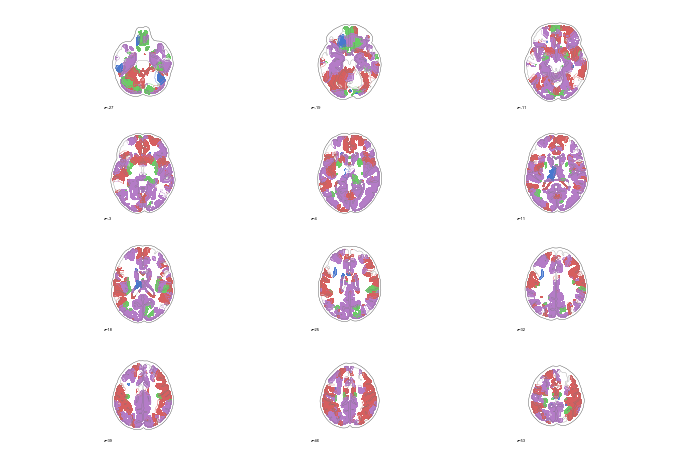

In [70]:
##figure 8

matdownprov=mlow2
matupprov=mup2
matupprov[np.where(np.isnan(matupprov))]=0
matdownprov[np.where(np.isnan(matdownprov))]=0
#figure 8A
#version with  4 colors
conceptmatshow(doublemat(matupprov,matdownprov,0),Zlabel=['all tasks','STOP','REWARD','WM','two tasks'],title='double_mostPotentALL')
#figure 8B
OrderRestRev = numpy.argsort(orderrest2)
plot3x4braincutCONCEPT(np.array([int(i) for i in mparea])[OrderRestRev],cut_coords=12,title='/'+fold+'/'+np.str(number)+'/slices_mostpotent.pdf')

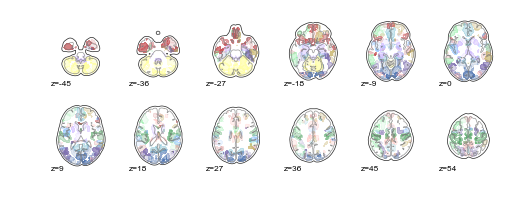

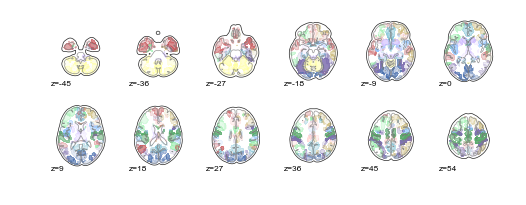

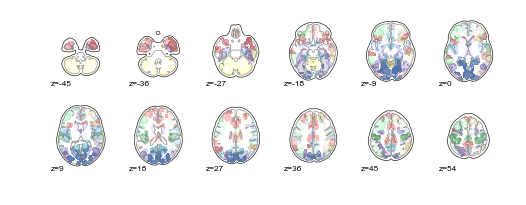

In [71]:
#supplementary figure 5-6-7: z slices 2 row of specific edge mean abs potency
for i in range(3):
    #all
    val=np.sum(specificALL[i],0)
    val[np.where(np.isnan(val))]=0
    OrderRestRev = numpy.argsort(orderrest2)
    val=val[OrderRestRev]
    plot12braincut(val,cut_coords='',title='specificALLabsPotency_'+NeuroIMAGE[i+1])
    plt.savefig('/'+fold+'/'+np.str(number)+'/specificALLabsPotency_'+NeuroIMAGE[i+1]+'.pdf')
    plt.show()
    

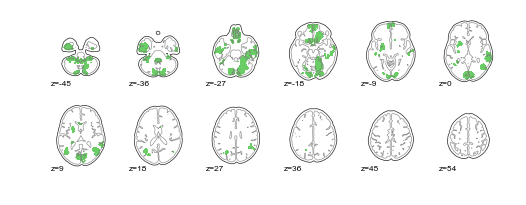

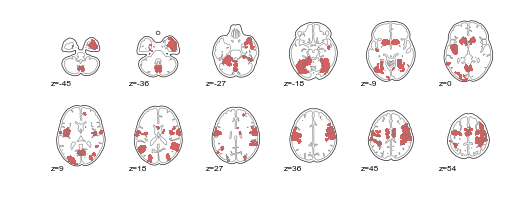

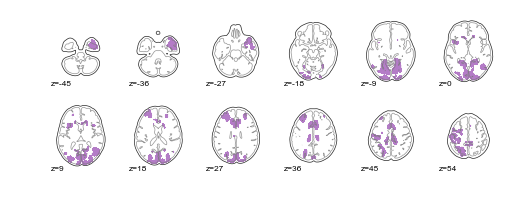

In [72]:
# figure 5-6-7 : #10% highest areas modulated by only one task
col = sns.color_palette("muted", 4)
for i in range(3):
    OrderRestRev = numpy.argsort(orderrest2)
    
    val=np.sum(specificALL[i],0)
    val[np.where(np.isnan(val))]=0
    ordermax=np.argsort(val)
    
    val[ordermax[:len(ordermax)-np.int(len(ordermax)*10/100)]]=0
    
    val[np.where(val!=0)]=1
    OrderRestRev = numpy.argsort(orderrest2)
    val=val[OrderRestRev]
    plot12braincut_uni(val,cut_coords='',title='th_specificALLabsPotency_'+NeuroIMAGE[i+1],col=[col[i+1] for j in range(number)])
    plt.savefig('/'+fold+'/'+np.str(number)+'/specificALLabsPotency_'+NeuroIMAGE[i+1]+'_th_uni.pdf')
    plt.show()


# potency and behavior

In [73]:

behavvalue=[[stopSSRT[1],'ssrt',stopIndex[1]],[rewardRTdiff[2],'RTdiff',rewardIndex[2]],[wmPerf[3],'perf',wmIndex[3]]]
corSensBehavEdge=[np.zeros((number,number)) for t in range(1,4)]

for t in range(1,4):
    behav=behavvalue[t-1]
    bmat=[]
    s0=[]
    for s in range(len(Upmatselect[t])):
        if s in behav[2] :
            bmat+=[np.array(behav[0])[np.where(np.array(behav[2])==s)]]
            s0+=[s]
 
    loc=where(provZALL[t-1]!=0)
    for j in range(len(loc[0])):
        p=[loc[0][j],loc[1][j]]
        corSensBehavEdge[t-1][p[0]][p[1]]=np.corrcoef([Upmatrices[t][s][p[0]][p[1]] for s in s0],[bmat[s][0] for s in range(len(bmat))])[0][1]
            


In [74]:
corSensBehavEdgeZscore=np.array(copy.deepcopy(corSensBehavEdge))
corSensBehavEdgeZscore[np.where(np.isnan(corSensBehavEdgeZscore))]=0
tri=np.zeros((number,number))
tri[np.triu_indices(number,1)]=1
for t in range(len(corSensBehavEdge)):
    corSensBehavEdgeZscore[t][np.where(corSensBehavEdgeZscore[t]*tri!=0.)]=(corSensBehavEdgeZscore[t][np.where(corSensBehavEdgeZscore[t]*tri!=0.)]-np.mean(corSensBehavEdgeZscore[t][np.where(corSensBehavEdgeZscore[t]*tri!=0.)]))/np.std(corSensBehavEdgeZscore[t][np.where(corSensBehavEdgeZscore[t]*tri!=0.)])
    corSensBehavEdgeZscore[t]=corSensBehavEdgeZscore[t]*tri+(corSensBehavEdgeZscore[t]*tri).T
    corSensBehavEdgeZscore[t][np.where(np.abs(corSensBehavEdgeZscore[t])<2.3)]=0

/home/mrstats/maamen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in divide


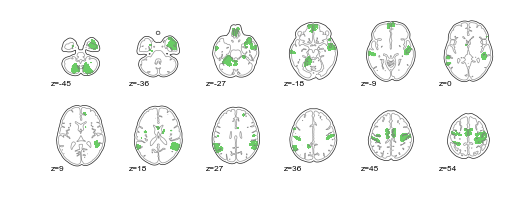

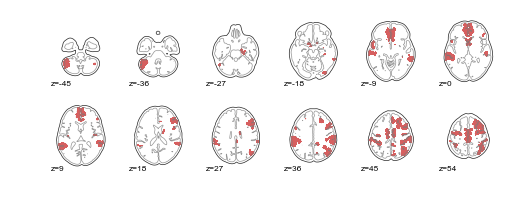

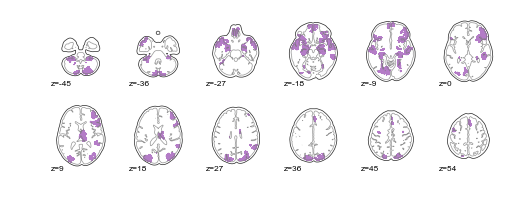

In [75]:
#supplementary figure 8-9-10
col = sns.color_palette("muted", 4)
for t in range(1,len(NeuroIMAGE)):
    

    keep=copy.deepcopy(corSensBehavEdgeZscore[t-1])
    keep2=np.abs(np.sign(corSensBehavEdge[t-1]))
    keep2[np.where(np.isnan(keep2))]=0
    vec=np.sum(np.abs(keep),0)/np.sum(keep2,0)
    vec[np.where(np.isnan(vec))]=0.
    OrderRestRev = numpy.argsort(orderrest2)
    vec=vec[OrderRestRev]
    ordermax=np.argsort(vec)
    vec[ordermax[:len(ordermax)-np.int(len(ordermax)*10/100.)]]=0
    vec[np.where(vec!=0)]=1.
    
    plot12braincut_uni(vec,cut_coords='',title='slice_corrbehav_th_'+NeuroIMAGE[t],col=[col[t] for j in range(number)])
    plt.savefig('/'+fold+'/'+np.str(number)+'/slice_corrbehavZscore_th_'+NeuroIMAGE[t]+'_uni.pdf')
    plt.show()
    
    

# RADAR PLOT 

In [76]:
#http://matplotlib.org/examples/api/radar_chart.html
"""
Example of creating a radar chart (a.k.a. a spider or star chart) [1]_.

Although this example allows a frame of either 'circle' or 'polygon', polygon
frames don't have proper gridlines (the lines are circles instead of polygons).
It's possible to get a polygon grid by setting GRIDLINE_INTERPOLATION_STEPS in
matplotlib.axis to the desired number of vertices, but the orientation of the
polygon is not aligned with the radial axes.

.. [1] http://en.wikipedia.org/wiki/Radar_chart
"""
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection


def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = 2*np.pi * np.linspace(0, 1-1./num_vars, num_vars)
    # rotate theta such that the first axis is at the top
    theta += np.pi/2

    def draw_poly_patch(self):
        verts = unit_poly_verts(theta)
        return plt.Polygon(verts, closed=True, edgecolor='k')

    def draw_circle_patch(self):
        # unit circle centered on (0.5, 0.5)
        return plt.Circle((0.5, 0.5), 0.5)

    patch_dict = {'polygon': draw_poly_patch, 'circle': draw_circle_patch}
    if frame not in patch_dict:
        raise ValueError('unknown value for `frame`: %s' % frame)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1
        # define draw_frame method
        draw_patch = patch_dict[frame]

        def fill(self, *args, **kwargs):
            """Override fill so that line is closed by default"""
            closed = kwargs.pop('closed', True)
            return super(RadarAxes, self).fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super(RadarAxes, self).plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(theta * 180/np.pi, labels)
            self.set_rlabel_position(90)
        def _gen_axes_patch(self):
            return self.draw_patch()

        def _gen_axes_spines(self):
            if frame == 'circle':
                return PolarAxes._gen_axes_spines(self)
            # The following is a hack to get the spines (i.e. the axes frame)
            # to draw correctly for a polygon frame.

            # spine_type must be 'left', 'right', 'top', 'bottom', or `circle`.
            spine_type = 'circle'
            verts = unit_poly_verts(theta)
            # close off polygon by repeating first vertex
            verts.append(verts[0])
            path = Path(verts)

            spine = Spine(self, spine_type, path)
            spine.set_transform(self.transAxes)
            return {'polar': spine}

    register_projection(RadarAxes)
    return theta




In [77]:
def valueWB(mat2,bi=0):
    #insire symetrisity
    tri=np.zeros((number,number))
    tri[np.triu_indices(number,1)]=1
    mat=(mat2*tri+(mat2*tri).T)
    if atlas=='ICPAtlas_v3_2':
        UpArea=np.array([0,20,32,53,71,88,101,124,151,165])
    else:
        
        UpArea=[0, 20, 42, 60, 71, 93, 111, 124, 132, 139, 156,179]#[0,19,31,53,75,93,101,119,132,139,161,184]#[19,12,22,22,18,8,18,13,7,22,23]
    matprov=np.zeros((2,number2))
    #mean
    #within
    for i in range(number2):
        matprov[0][i]=np.sum(mat[UpArea[i]:UpArea[i+1],UpArea[i]:UpArea[i+1]])-np.sum(np.diag(mat)[UpArea[i]:UpArea[i+1]])
    #between
    prov2=np.sum(mat,0)-np.diag(mat)
    matprov[1]=[np.sum(prov2[UpArea[i]:UpArea[i+1]])-matprov[0][i] for i in range(number2)]
    #mean
    if bi==1:
        matprov[0]=matprov[0]/[(UpArea[i+1]-UpArea[i])*(UpArea[i+1]-UpArea[i])-(UpArea[i+1]-UpArea[i])/2. for i in range(number2)]
    else:
        matprov[0]=matprov[0]/[np.sum(np.sign(mat)[UpArea[i+1]:UpArea[i],UpArea[i+1]:UpArea[i]])-np.sum(np.diag(mat)[UpArea[i+1]:UpArea[i]]) for i in range(number2)]
    if bi==1:
        matprov[1]=matprov[1]/[(UpArea[i+1]-UpArea[i])*(number-1) for i in range(number2)]
    else:
        matprov[1]=matprov[1]/[np.sum(np.sign(matprov[UpArea[i+1]:UpArea[i]]))-np.sign(np.diag(matprov)[UpArea[i+1]:UpArea[i]])-len(prov[i]) for i in range(number2)]
        
    return [[matprov[0]],[matprov[1]]]

In [78]:
def unit_poly_verts(theta):
    """Return vertices of polygon for subplot axes.

    This polygon is circumscribed by a unit circle centered at (0.5, 0.5)
    """
    x0, y0, r = [0.5] * 3
    verts = [(r*np.cos(t) + x0, r*np.sin(t) + y0) for t in theta]
    return verts



def plotr2(data,title,filename,legend=['modulated by one task only','modulated by all tasks'],tcol=['b','y'],colors='',valy=[]):#if __name__ == '__main__':
    N = number2
    theta = radar_factory(N, frame='polygon')
    
    
    tronc=1000000.

    fig = plt.figure(figsize=(9, 9))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)
    if colors=='':
        colors = [[(102./255,153/255.,204./255),(66./255,71/255.,236./255)],[(204./255,204/255.,102./255),(153./255,153/255.,0./255)]]
    # Plot the four cases from the example data on separate axes
    if valy==[]:
        valy=[int((np.max(data)-np.min(data))/3.), int(2*(np.max(data)-np.min(data))/3.), np.int(np.max(data))-1]
    print valy
    for n in range(len(data)):
        ax = fig.add_subplot(1, 2, n+1, projection='radar')
        #valy=[int((np.max(data[n])-np.min(data[n]))/3.), int(2*(np.max(data[n])-np.min(data[n]))/3.), np.int(np.max(data[n]))-1]
        plt.rgrids(valy)
        print valy
        ax.set_title(title[n], weight='bold', size=12, position=(0.5, 1.1+0.05*len(data[0])),
                     horizontalalignment='center', verticalalignment='center',color=tcol[n])
        for d, color,leg in zip(data[n], colors[n],legend):
            
            ax.plot(theta, d, color=color,label=leg)
            ax.fill(theta, d, facecolor=color, alpha=0.25)
            plt.legend(loc=(0.2, 1.05))
        ax.set_ylim(0,np.max(data))
        ax.set_varlabels(net)
    
    plt.savefig('/'+fold+'/'+np.str(number)+'/'+filename+'.pdf')
    plt.show()
    

def plotrbarplot2(data,taskdat,title,filename):
    N = number2
    theta = radar_factory(N, frame='polygon')
    
    
    tronc=1000000.

    fig = plt.figure(figsize=(9, 9))
    fig.subplots_adjust(top=1.)

    colors = ['y','b','y']
    ind=[1,0]
    for n in range(len(data)):
        valy=[int((np.max(data[n])-np.min(data[n]))/3.)+1, int(2*(np.max(data[n])-np.min(data[n]))/3.)+1, np.int(np.max(data[n]))+1]#[int((np.max(data[n])-np.min(data[n]))/3.*tronc)/tronc, int(2*(np.max(data[n])-np.min(data[n]))/3.*tronc)/tronc, np.int(np.max(data[n])*tronc)/tronc])#[np.min(prov[n][0]),np.min(prov[n][0])+(np.max(prov[n][0])+np.min(prov[n][0]))/2.,np.max(prov[n][0])])
        ax= plt.subplot2grid((12,8), (6*n,0), rowspan=6,colspan=3, projection='radar')
        sns.set_style("darkgrid")
        plt.rgrids(valy)
        
        ax.set_title(title[n], weight='bold',color=colors[n+1], size='large', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
        i=0
        for d, color in zip(data[n], colors):
            if n==0:
                ax.plot(theta, d, color=color,label=title[i])
            else:
                ax.plot(theta, d, color=color)
            ax.fill(theta, d, facecolor=color, alpha=0.25)
            
            i+=1
        ax.set_varlabels(net)
        ax.plot(theta, np.zeros(number2), color=color)
        sns.set_style("dark")
        
        sns.axes_style()
        ax = plt.subplot2grid((12,8), (6*n+2,4),colspan=3, rowspan=2)
        ax.yaxis.grid()
       
        
        prov=np.array([g[n] for g in (np.array(taskdat)/np.sum(taskdat,0)*100)])
        prov[np.where(np.isnan(prov))]=0
        barplotpercent(prov)
        plt.legend(loc='center left',bbox_to_anchor=(1,1.5))
        taskperc=np.mean(prov,2)
        taskpercsd=np.std(prov,2)
        plt.ylabel('task\nproportion (%)')
        plt.xlim([-1,len(net)])
        sns.set_style("dark")
        ax = plt.subplot2grid((24,8), (12*n+1,4),colspan=3, rowspan=3)
        ax.yaxis.grid()
        
        prov=(10000*np.array(np.sum(taskdat,0)))/100.
        plt.bar(np.arange(number2),prov[n][0],0.35,color=colors[n+1])
        
        plt.ylabel('selected\nedges (%)')
        plt.xticks(np.arange(len(net)),['' for i in order],rotation=45)
        plt.yticks(valy)
        
        plt.xlim([-1,len(net)])
        
        ###task proportion of selected edges
        col = sns.color_palette("muted",4)
        sns.set_style("dark")
        ax = plt.subplot2grid((12,8), (6*n+2,7),colspan=1, rowspan=2)
        ax.yaxis.grid()
        
        plt.bar([0],taskperc[0],0.35,color=col[1])
        plt.bar([1],taskperc[1],0.35,color=col[2])
        plt.bar([2],taskperc[2],0.35,color=col[3])
        plt.errorbar([0.175,1.175,2.175], taskperc, yerr=taskpercsd,ecolor='k',fmt='.')
        #### add standard error
        plt.xticks(np.arange(3),['' for i in range(3)],rotation=45)
        plt.yticks([20,40,60,80,100],['' for i in [20,40,60,80,100]])
        plt.xlim([-0.5,2.85])
        
    
    plt.savefig('/'+fold+'/'+np.str(number)+'/'+filename+'.pdf')
    plt.show()

In [79]:

common=np.sum(np.sign(np.abs(1-med2))[1:],0)
common[np.where(common!=3)]=0
common=common/3
within=[]
between=[]
for i in range(3):
    for j in (np.array(valueWB(specificALL[i],1))/np.array(valueWB(common,1)))[0][0]: 
        if j!=np.inf and not np.isnan(j):
            within+=[j]
    for j in (np.array(valueWB(specificALL[i],1))/np.array(valueWB(common,1)))[1][0]:
        if j!=np.inf and not np.isnan(j):
            between+=[j]


/home/mrstats/maamen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in divide
/home/mrstats/maamen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in divide
/home/mrstats/maamen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in divide
/home/mrstats/maamen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in divide


/home/mrstats/maamen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide
/home/mrstats/maamen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in divide


[25, 51, 76]
[25, 51, 76]
[25, 51, 76]


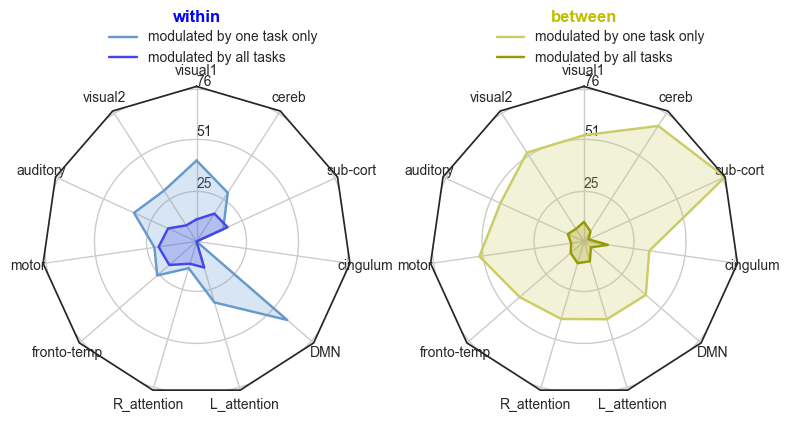

In [80]:
#figure 6
sensibilityprov=np.array(valueWB(np.sum(np.abs(provZALL),0),1))
prov=np.array(valueWB(np.sign(np.sum(np.abs(specificALL),0)),1))

prov_masked=prov/sensibilityprov

common_masked=np.array(valueWB(np.abs(common),1))
common_masked=common_masked/sensibilityprov

provt=np.array([valueWB(np.abs(specificALL[i]),1) for i in range(3)])
provt[np.where(np.isnan(provt))]=0
prov_masked[np.where(np.isnan(prov_masked))]=0
prov_masked[np.where(prov_masked!=0)]=[np.int(i*10000)/100. for i in prov_masked[np.where(prov_masked!=0)]]
common_masked[np.where(np.isnan(common_masked))]=0
common_masked[np.where(common_masked!=0)]=[np.int(i*10000)/100. for i in common_masked[np.where(common_masked!=0)]]
plotr2([[prov_masked[0][0],common_masked[0][0]],[prov_masked[1][0],common_masked[1][0]]],['within','between'],'radar_commonandspecific')#,valy=[0,25,51,76])

/home/mrstats/maamen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide


[22, 44, 65]
[22, 44, 65]
[22, 44, 65]


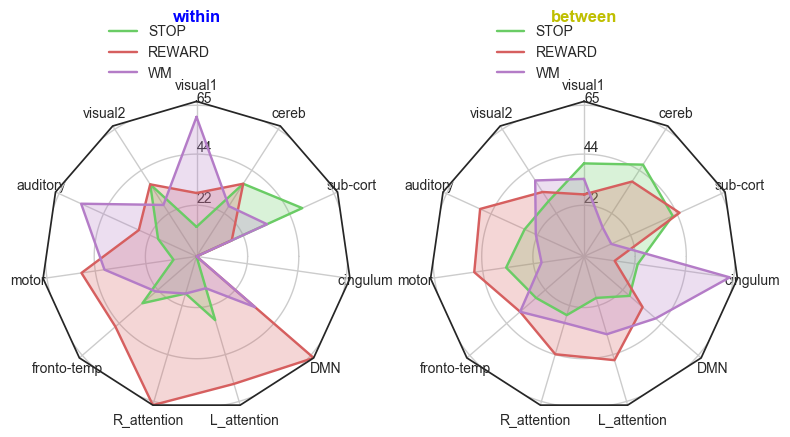

In [81]:
#figure 6
provt=np.array([valueWB(np.abs(specificALL[i]),1) for i in range(3)])
provt[np.where(np.isnan(provt))]=0

provt_masked=np.array([(10000*provt[i]/np.sum(provt,0))/100. for i in range(len(provt))])

provt_masked[np.where(np.isnan(provt_masked))]=0
col = sns.color_palette("muted",4)
plotr2([[provt_masked[i][0][0] for i in range(len(provt))],[provt_masked[i][1][0] for i in range(len(provt))]],['within','between'],'radar_specificpertask',NeuroIMAGE[1:],colors=[col[1:],col[1:]])

/home/mrstats/maamen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:84: RuntimeWarning: invalid value encountered in divide


[[[ 22.79411765  30.15873016  25.          25.53191489  30.          18.60465116
    31.81818182   0.           0.          39.02439024  34.7107438 ]]

 [[ 33.08823529  33.33333333  31.25        36.17021277  36.          46.51162791
    36.36363636  60.           0.          24.3902439   32.23140496]]

 [[ 44.11764706  36.50793651  43.75        38.29787234  34.          34.88372093
    31.81818182  40.           0.          36.58536585  33.05785124]]] [[ 23.42206634]
 [ 33.57624496]
 [ 33.91077961]]
[[[ 37.16814159  28.57142857  30.64516129  30.89430894  30.93922652
    27.65957447  25.47169811  27.27272727  25.27472527  38.75        44.06779661]]

 [[ 27.43362832  32.91925466  39.51612903  41.46341463  29.83425414
    37.58865248  37.73584906  28.78787879  28.57142857  41.25        33.05084746]]

 [[ 35.39823009  38.50931677  29.83870968  27.64227642  39.22651934
    34.75177305  36.79245283  43.93939394  46.15384615  20.          22.88135593]]] [[ 31.51952624]
 [ 34.37739429]
 [ 34.1

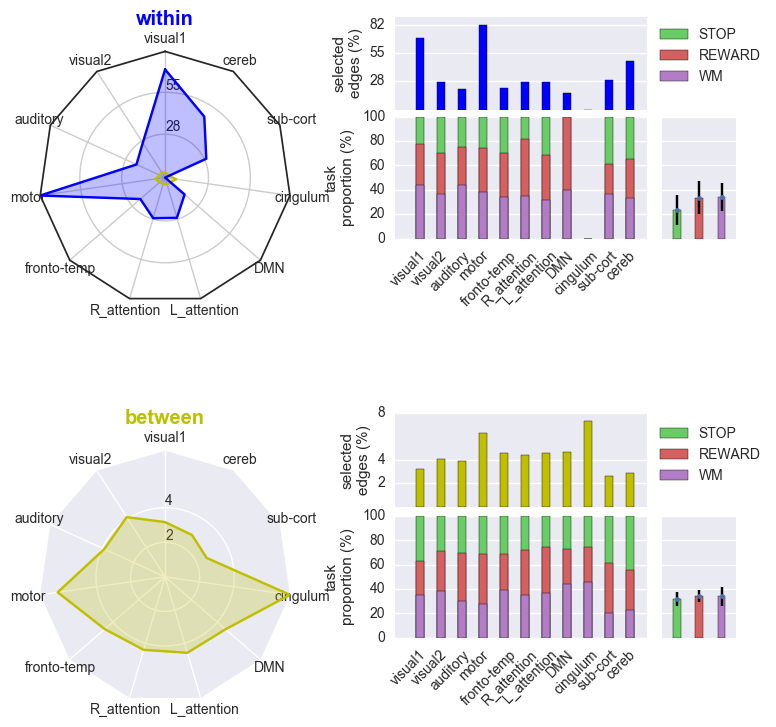

In [82]:
#figure 5
prov=np.array(valueWB(np.sum(np.abs(provZALL),0),1))
provt=np.array([valueWB(np.abs(provZALL[i]),1) for i in range(3)])
provt[np.where(np.isnan(provt))]=0
prov[np.where(np.isnan(prov))]=0

prov[np.where(prov!=0)]=[np.int(i*10000)/100. for i in prov[np.where(prov!=0)]]
sensitivity=prov

plotrbarplot2([[prov[1][0],prov[0][0]],[prov[1][0]]],provt,['within','between'],'radar_sensitivityBIS')

# reproducibility indiviual selection

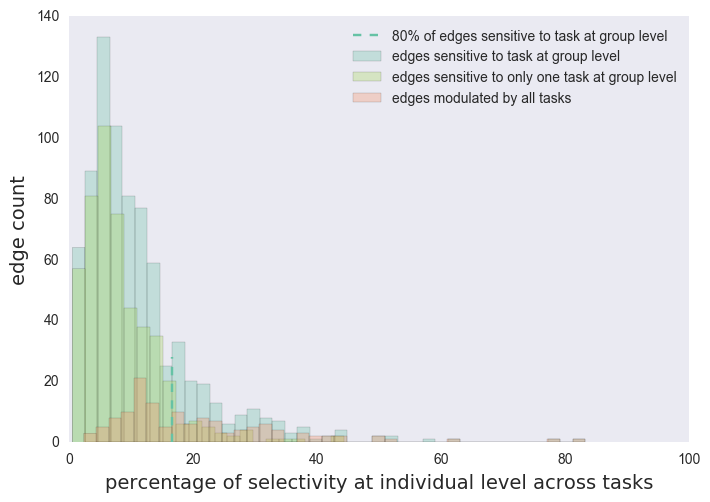

0.898311588642
0.989959068816
0.149527808108 0.023855205935
0.0601503759398


In [83]:
#figure 9
brainshow=np.sum([np.sum(Upmatselect[i],0)/np.max(np.sum(Upmatselect[i],0)) for i in range(1,4)],0)/3.
colprov=sns.color_palette("Set2", 8)

datacurve=[brainshow[np.triu_indices(number,1)][np.nonzero(brainshow[np.triu_indices(number,1)])],(brainshow*np.sign(np.sum(np.abs(provZALL),0)))[np.triu_indices(number,1)][[g for g in np.nonzero((brainshow*np.sign(np.sum(np.abs(provZALL),0)))[np.triu_indices(number,1)])[0]]],(brainshow*np.sign(np.sum(np.abs(specificALL),0)))[np.triu_indices(number,1)][[g for g in np.nonzero((brainshow*np.sign(np.sum(np.abs(specificALL),0)))[np.triu_indices(number,1)])[0]]],(brainshow*np.sign(np.abs(common)))[np.triu_indices(number,1)][np.nonzero((brainshow*np.sign(common))[np.triu_indices(number,1)])]]

plt.hist(datacurve[1],color=colprov[0],bins=np.int((np.max(datacurve[1])-np.min(datacurve[1]))*100)/2,alpha=0.3,label='edges sensitive to task at group level')
plt.hist(datacurve[2],color=colprov[4],bins=np.int((np.max(datacurve[2])-np.min(datacurve[2]))*100)/2,alpha=0.3,label='edges sensitive to only one task at group level')
plt.hist(datacurve[3],color=colprov[1],bins=np.int((np.max(datacurve[3])-np.min(datacurve[3]))*100)/2,alpha=0.3,label='edges modulated by all tasks')
plt.axvline(x=0.1655,ymin=0,ymax=0.20,linestyle='dashed',label='80% of edges sensitive to task at group level',color=colprov[0])

plt.legend(fontsize=10,loc=1)
plt.xlim([0,1])
plt.xlabel('percentage of selectivity at individual level across tasks',fontsize=14)
plt.xticks([0.,0.2,0.4,0.6,0.8,1.],['0','20','40','60','80','100'])
plt.ylabel('edge count',fontsize=14)
plt.savefig('/'+fold+'/'+np.str(number)+'/reproducibilityhistogram_seabornnotnorm.pdf')
plt.show()

print len(np.where(brainshow[np.triu_indices(number,1)][np.nonzero(brainshow[np.triu_indices(number,1)])]<=0.1)[0])/np.float(len(np.where(brainshow[np.triu_indices(number,1)]!=0)[0]))
print len(np.where(brainshow[np.triu_indices(number,1)][np.nonzero(brainshow[np.triu_indices(number,1)])]<=0.2)[0])/np.float(len(np.where(brainshow[np.triu_indices(number,1)]!=0)[0]))
print (2.3*np.std(brainshow[np.triu_indices(number,1)]))+np.mean(brainshow[np.triu_indices(number,1)]),len(np.where(brainshow[np.triu_indices(number,1)][np.nonzero(brainshow[np.triu_indices(number,1)])]>=(2.3*np.std(brainshow[np.triu_indices(number,1)]))+np.mean(brainshow[np.triu_indices(number,1)]))[0])/np.float(len(np.where(brainshow[np.triu_indices(number,1)]!=0)[0]))
print np.sum(np.sign(np.abs(common[np.triu_indices(number,1)][(np.where(brainshow[np.triu_indices(number,1)][np.nonzero(brainshow[np.triu_indices(number,1)])]>=(2.3*np.std(brainshow[np.triu_indices(number,1)]))+np.mean(brainshow[np.triu_indices(number,1)])))])))/np.float(np.sum(np.sign(np.abs(common[np.triu_indices(number,1)]))))



In [84]:
#figure 10
##reproducible area / json file for the connectivity circle

cut_coords = (0, 0, 0)

OrderRestRev = numpy.argsort(orderrest2)
brainshow=np.sum([np.sum(Upmatselect[i],0)/np.max(np.sum(Upmatselect[i],0)) for i in range(1,4)],0)
brainshow[np.where(brainshow<1.2)]=0 #in average across tasks, selected in 40% of participants
brainVal=np.sum(brainshow,0)


colorgroup=np.array([(0,204,0),(0,204,204),(255,0,0),(255,102,178),(204,0,204),(178,102,255),(0,0,255)])/255.
OrderRestRev = numpy.argsort(orderrest2)
mat=[Upmatrices]
grouplabel=['all group']
indmat=[[0]]
UpArea=[0,20,31,53,75,93,101,119,132,139,156,179]
N=[20,11,22,22,18,8,18,13,7,17,23]
pal=np.concatenate([sns.color_palette("deep",6),sns.color_palette("pastel",6)],axis=0)
pal2=np.concatenate([[pal[i] for j in range(N[i])] for i in range(number2)],axis=0)
namearea=np.concatenate([['mat.'+net[i]+'.'+net[i]+'_'+np.str(j) for j in range(N[i])] for i in range(number2)],axis=0)
netarea=np.concatenate([[net[i] for j in range(N[i])] for i in range(number2)],axis=0)
print len(namearea)
for e,i in enumerate([0]):
    prov=copy.deepcopy(brainshow)
    prov[np.where(np.isnan(prov))]=0
    
    provtest=np.zeros(number)
    

    with open('/'+fold+'/'+np.str(number)+'/repro'+grouplabel[i]+'.json','w') as f:
        f.write('[\n')
        for o in range(number):
            f.write('{"name":"'+namearea[o]+'","size":6000,"net":"'+netarea[o]+'","type":"'+grouplabel[i].replace('&','').replace(' ','-')+'","imports":[')
            keep=[]
        
            for j in range(number):
                if prov[o][j]!=0:
                
                    keep+='"'+namearea[j]+'",'
            if keep!=[]:
            
                f.write(''.join(keep[:len(keep)-1]))
            if provtest[o]<=0.05:
                f.write('],"significant":1}')
            else:
                f.write(']}')
            
            if o==number-1:
                f.write('\n]')
            else:
                f.write(',\n')


179


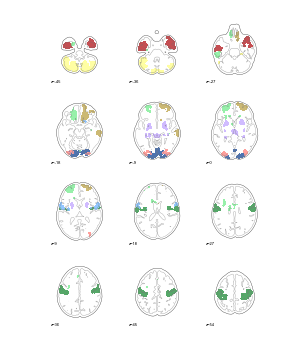

In [85]:
#figure 10 : brain slice
cut_coords = (0, 0, 0)

OrderRestRev = numpy.argsort(orderrest2)
brainshow=np.sum([np.sum(Upmatselect[i],0)/np.max(np.sum(Upmatselect[i],0)) for i in range(1,4)],0)
brainshow[np.where(brainshow<1.2)]=0 #in average across tasks, selected in 40% of participants
brainshow[np.where(np.isnan(brainshow))]=0
brainVal=np.sum(brainshow,0)
brainVal=brainVal[OrderRestRev]
brainshow=brainshow[:,OrderRestRev]
brainshow=brainshow[OrderRestRev,:]
plot3x4braincut(np.sign(brainVal))
plt.savefig('/'+fold+'/'+np.str(number)+'/slices3x4reproducibilityEQUAL.pdf')
plt.show()

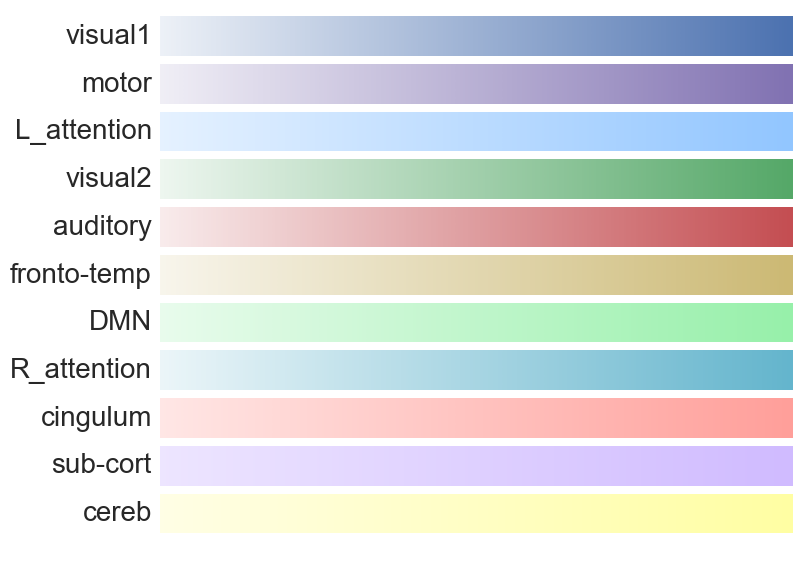

In [86]:
#color gradient
order=np.array([0,3,6,1,2,4,7,5,8,9,10])

cmaps = [('Networks',     [sns.light_palette(pal[i], as_cmap=True) for i in order],[net[i] for i in order])]
    

nrows = max(len(cmap_list) for cmap_category, cmap_list,cmap_net in cmaps)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

def plot_color_gradients(cmap_category, cmap_list,cmap_net):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    
    a=0
    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, cmap_net[a], va='center', ha='right', fontsize=20)
        a+=1

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()
    
for cmap_category, cmap_list,cmap_net in cmaps:
    plot_color_gradients(cmap_category, cmap_list,cmap_net)

plt.savefig('/'+fold+'/'+np.str(number)+'/gradleg.pdf')
plt.show()
plt.close()

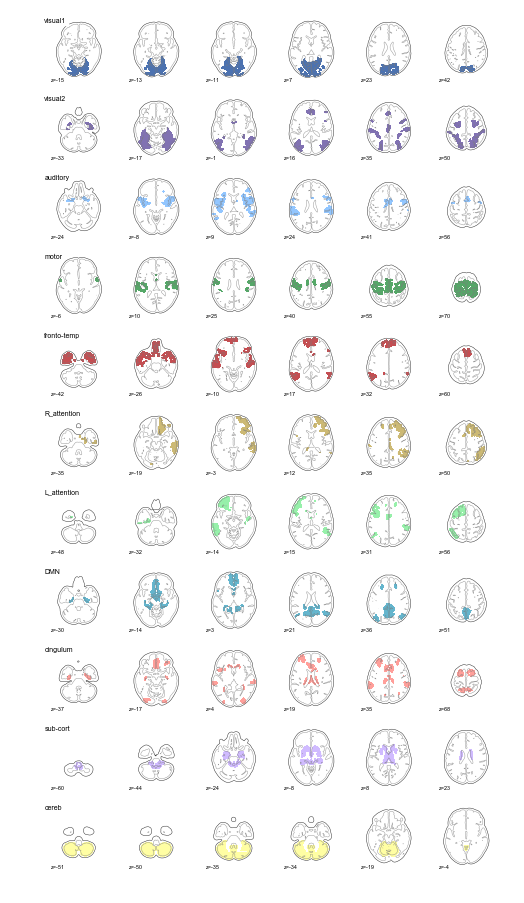

In [87]:
#figure 1
UpArea2=[0,20,31,53,75,93,101,119,132,139,156,179]
net2=['visual1','motor','fronto-temp','visual2','R_attention','DMN','auditory','L_attention','cingulum','sub-cort','cereb']
fig=plt.figure(figsize=(6,11))
order=np.array([0,3,6,1,2,4,7,5,8,9,10])
j=0
for i in order:#range(11):
    ax=plt.subplot(11,1,j+1)
    atlasname='/atlas_complete_GM_1mm_4Dwithout149_152_155_158_159_160.nii.gz'
    brainval=np.zeros(number)
    brainval[UpArea2[i]:UpArea2[i+1]]=1
    plotslicesZ(brainval,cut_coords=6,axes=ax,reduc=3,title=net2[i])
    j+=1
plt.savefig('/'+fold+'/'+np.str(number)+'/networksNEW.pdf')
plt.show()